# Exploratory Data Analysis

Prior to creating our four desired models, we will be conducting exploratory data analysis to determine what relationship if any exists between the target variable and the independent variables. Before we can conduct the exploratory analysis, we will review the dataset for any missing values, convert any variables to the correct data format, review the results of the analysis to determine if any new variables should be created, perform cluster analysis and feature selection.

## Data Preparation

We will need to prepare our data prior to creating any visualizations, performing cluster analysis or feature selection.  In this section we will explore the raw dataset and prepare the data for the next sections.

### Import the libraries and modules for the data transformations and exploratory data analysis

In [2]:
pip install xgboost

  Using cached xgboost-1.6.2-py3-none-win_amd64.whl (125.4 MB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from matplotlib.dates import DateFormatter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Upload the dataset into a pandas dataframe format

In [3]:
aml_df = pd.read_csv("PS_20174392719_1491204439457_log.csv")

### Run the info function on the dataframe to review the column name and data type

We will review the different variables in the dataframe:  
1. The step variable, which represents the date and time of the transaction are in integer format, not datatime format and will need to be addressed.  
2. The type variable, represents the transaction type and are in the correct object format.
3. The amount variable, representing the dollar amount of the transaction are in the float64 numerical format, and do not need to be transformed.  
4. The nameOrig variable, which is the unique identifier for each customer and is in the correct object format.  
5. The oldbalanceOrg, represents the customers original balance prior to the transaction being conducted and is in the correct float64 numerical format.  
6. The newbalanceOrig represents the customers new balance after the transaction has been conducted and is in the correct float64 numerical format.  
7. The nameDest variable, is the unique identifier for each customer and is the correct object format.  
8. The oldbalanceDest is the original balance in the recipients account prior to the transaction being received and is in the correct float64 numerical format.  
9. The newbalanceDest is the new balance in the recipients account after the transaction has been received and is in the correct float64 numerical format.  
10. The isFraud variable is the target variable for our business problem, for the models this is an acceptable format, however for visualizations we will change the format to a more understandable "Good" and "Bad" string format.  
11. The isFlaggedFraud is an additional indicator added to customer's accounts when the transaction is over \\$200,000 to identify the transaction as potential fraud.  For our models this variable is in the correct format, again for visualizations we will want to change this variable to a more understandable "Good" and "Bad" string format.  

In addition to the above changes, we will also change the naming of the columns to more understandable string.

In [5]:
aml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


### Run the head function to view the top 5 rows of the dataset and view the format of the dataframe

In [10]:
aml_df.head()

,Date,Transaction_Type,Amount,Customer_ID,Cust_Balance_Orig,Cust_Balance_New,Recipient_ID,Rec_Balance_Orig,Rec_Balance_New,AML_Label,Flagged_Fraud
0,2022-01-01,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,Good,No
1,2022-01-01,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,Good,No
2,2022-01-01,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,Bad,No
3,2022-01-01,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,Bad,No
4,2022-01-01,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,Good,No


### Count the number of unique customers in the dataframe

In [84]:
aml_df["nameOrig"].value_counts()

C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: nameOrig, Length: 6353307, dtype: int64

### Count the number of unique receipients in the dataframe

In [85]:
aml_df["nameDest"].value_counts()

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: nameDest, Length: 2722362, dtype: int64

### Count the number of NaN values in the dataframe

There appear to be no null values in the dataframe, which would need to be imputed or removed.

In [86]:
aml_df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [87]:
aml_df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### Show the range of the step variable

In [4]:
aml_df["step"]

0            1
1            1
2            1
3            1
4            1
          ... 
6362615    743
6362616    743
6362617    743
6362618    743
6362619    743
Name: step, Length: 6362620, dtype: int64

### Transform the step variable from integer to datetime format

1. Based on the data dictionary provided by the business, we know the step variable represents a one hour increment over a thirty one day window, starting January 1, 2022
2. Convert the step variable to string format
3. Using the numpy where function, we replace the integer with the corresponding date and time string for each step value in the dataset

In [5]:
aml_df["step"] = aml_df["step"].astype('str')
aml_df["step"] = np.where(aml_df["step"]=='1', "2022-01-01 00:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='2', "2022-01-01 01:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='3', "2022-01-01 02:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='4', "2022-01-01 03:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='5', "2022-01-01 04:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='6', "2022-01-01 05:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='7', "2022-01-01 06:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='8', "2022-01-01 07:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='9', "2022-01-01 08:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='10', "2022-01-01 09:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='11', "2022-01-01 10:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='12', "2022-01-01 11:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='13', "2022-01-01 12:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='14', "2022-01-01 13:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='15', "2022-01-01 14:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='16', "2022-01-01 15:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='17', "2022-01-01 16:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='18', "2022-01-01 17:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='19', "2022-01-01 18:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='20', "2022-01-01 19:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='21', "2022-01-01 20:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='22', "2022-01-01 21:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='23', "2022-01-01 22:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='24', "2022-01-01 23:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='25', "2022-01-02 00:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='26', "2022-01-02 01:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='27', "2022-01-02 02:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='28', "2022-01-02 03:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='29', "2022-01-02 04:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='30', "2022-01-02 05:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='31', "2022-01-02 06:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='32', "2022-01-02 07:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='33', "2022-01-02 08:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='34', "2022-01-02 09:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='35', "2022-01-02 10:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='36', "2022-01-02 11:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='37', "2022-01-02 12:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='38', "2022-01-02 13:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='39', "2022-01-02 14:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='40', "2022-01-02 15:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='41', "2022-01-02 16:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='42', "2022-01-02 17:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='43', "2022-01-02 18:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='44', "2022-01-02 19:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='45', "2022-01-02 20:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='46', "2022-01-02 21:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='47', "2022-01-02 22:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='48', "2022-01-03 03:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='49', "2022-01-04 00:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='50', "2022-01-03 01:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='51', "2022-01-03 02:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='52', "2022-01-03 03:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='53', "2022-01-03 04:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='54', "2022-01-03 05:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='55', "2022-01-03 06:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='56', "2022-01-03 07:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='57', "2022-01-03 08:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='58', "2022-01-03 09:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='59', "2022-01-03 10:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='60', "2022-01-03 11:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='61', "2022-01-03 12:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='62', "2022-01-03 13:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='63', "2022-01-03 14:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='64', "2022-01-03 15:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='65', "2022-01-03 16:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='66', "2022-01-03 17:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='67', "2022-01-03 18:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='68', "2022-01-03 19:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='69', "2022-01-03 20:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='70', "2022-01-03 21:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='71', "2022-01-03 22:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='72', "2022-01-03 23:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='73', "2022-01-04 00:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='74', "2022-01-04 01:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='75', "2022-01-04 02:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='76', "2022-01-04 03:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='77', "2022-01-04 04:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='78', "2022-01-04 05:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='79', "2022-01-04 06:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='80', "2022-01-04 07:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='81', "2022-01-04 08:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='82', "2022-01-04 09:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='83', "2022-01-04 10:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='84', "2022-01-04 11:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='85', "2022-01-04 12:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='86', "2022-01-04 13:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='87', "2022-01-04 14:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='88', "2022-01-04 15:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='89', "2022-01-04 16:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='90', "2022-01-04 17:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='91', "2022-01-04 18:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='92', "2022-01-04 19:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='93', "2022-01-04 20:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='94', "2022-01-04 21:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='95', "2022-01-04 22:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='96', "2022-01-04 23:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='97', "2022-01-05 00:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='98', "2022-01-05 01:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='99', "2022-01-05 02:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='100', "2022-01-05 03:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='101', "2022-01-05 04:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='102', "2022-01-05 05:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='103', "2022-01-05 06:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='104', "2022-01-05 07:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='105', "2022-01-05 08:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='106', "2022-01-05 09:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='107', "2022-01-05 10:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='108', "2022-01-05 11:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='109', "2022-01-05 12:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='110', "2022-01-05 13:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='111', "2022-01-05 14:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='112', "2022-01-05 15:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='113', "2022-01-05 16:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='114', "2022-01-05 17:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='115', "2022-01-05 18:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='116', "2022-01-05 19:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='117', "2022-01-05 20:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='118', "2022-01-05 21:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='119', "2022-01-05 22:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='120', "2022-01-05 23:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='121', "2022-01-06 00:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='122', "2022-01-06 01:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='123', "2022-01-06 02:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='124', "2022-01-06 03:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='125', "2022-01-06 04:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='126', "2022-01-06 05:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='127', "2022-01-06 06:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='128', "2022-01-06 07:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='129', "2022-01-06 08:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='130', "2022-01-06 09:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='131', "2022-01-06 10:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='132', "2022-01-06 11:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='133', "2022-01-06 12:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='134', "2022-01-06 13:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='135', "2022-01-06 14:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='136', "2022-01-06 15:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='137', "2022-01-06 16:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='138', "2022-01-06 17:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='139', "2022-01-06 18:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='140', "2022-01-06 19:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='141', "2022-01-06 20:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='142', "2022-01-06 21:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='143', "2022-01-06 22:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='144', "2022-01-06 23:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='145', "2022-01-07 00:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='146', "2022-01-07 01:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='147', "2022-01-07 02:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='148', "2022-01-07 03:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='149', "2022-01-07 04:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='150', "2022-01-07 05:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='151', "2022-01-07 06:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='152', "2022-01-07 07:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='153', "2022-01-07 08:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='154', "2022-01-07 09:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='155', "2022-01-07 10:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='156', "2022-01-07 11:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='157', "2022-01-07 12:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='158', "2022-01-07 13:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='159', "2022-01-07 14:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='160', "2022-01-07 15:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='161', "2022-01-07 16:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='162', "2022-01-07 17:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='163', "2022-01-07 18:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='164', "2022-01-07 19:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='165', "2022-01-07 20:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='166', "2022-01-07 21:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='167', "2022-01-07 22:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='168', "2022-01-07 23:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='169', "2022-01-08 00:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='170', "2022-01-08 01:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='171', "2022-01-08 02:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='172', "2022-01-08 03:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='173', "2022-01-08 04:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='174', "2022-01-08 05:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='175', "2022-01-08 06:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='176', "2022-01-08 07:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='177', "2022-01-08 08:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='178', "2022-01-08 09:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='179', "2022-01-08 10:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='180', "2022-01-08 11:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='181', "2022-01-08 12:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='182', "2022-01-08 13:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='183', "2022-01-08 14:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='184', "2022-01-08 15:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='185', "2022-01-08 16:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='186', "2022-01-08 17:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='187', "2022-01-08 18:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='188', "2022-01-08 19:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='189', "2022-01-08 20:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='190', "2022-01-08 21:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='191', "2022-01-08 22:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='192', "2022-01-08 23:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='193', "2022-01-09 00:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='194', "2022-01-09 01:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='195', "2022-01-09 02:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='196', "2022-01-09 03:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='197', "2022-01-09 04:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='198', "2022-01-09 05:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='199', "2022-01-09 06:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='200', "2022-01-09 07:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='201', "2022-01-09 08:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='202', "2022-01-09 09:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='203', "2022-01-09 10:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='204', "2022-01-09 11:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='205', "2022-01-09 12:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='206', "2022-01-09 13:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='207', "2022-01-09 14:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='208', "2022-01-09 15:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='209', "2022-01-09 16:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='210', "2022-01-09 17:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='211', "2022-01-09 18:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='212', "2022-01-09 19:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='213', "2022-01-09 20:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='214', "2022-01-09 21:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='215', "2022-01-09 22:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='216', "2022-01-09 23:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='217', "2022-01-10 00:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='218', "2022-01-10 01:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='219', "2022-01-10 02:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='220', "2022-01-10 03:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='221', "2022-01-10 04:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='222', "2022-01-10 05:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='223', "2022-01-10 06:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='224', "2022-01-10 07:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='225', "2022-01-10 08:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='226', "2022-01-10 09:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='227', "2022-01-10 10:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='228', "2022-01-10 11:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='229', "2022-01-10 12:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='230', "2022-01-10 13:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='231', "2022-01-10 14:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='232', "2022-01-10 15:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='233', "2022-01-10 16:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='234', "2022-01-10 17:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='235', "2022-01-10 18:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='236', "2022-01-10 19:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='237', "2022-01-10 20:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='238', "2022-01-10 21:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='239', "2022-01-10 22:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='240', "2022-01-10 23:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='241', "2022-01-11 00:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='242', "2022-01-11 01:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='243', "2022-01-11 02:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='244', "2022-01-11 03:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='245', "2022-01-11 04:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='246', "2022-01-11 05:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='247', "2022-01-11 06:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='248', "2022-01-11 07:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='249', "2022-01-11 08:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='250', "2022-01-11 09:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='251', "2022-01-11 10:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='252', "2022-01-11 11:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='253', "2022-01-11 12:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='254', "2022-01-11 13:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='255', "2022-01-11 14:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='256', "2022-01-11 15:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='257', "2022-01-11 16:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='258', "2022-01-11 17:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='259', "2022-01-11 18:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='260', "2022-01-11 19:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='261', "2022-01-11 20:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='262', "2022-01-11 21:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='263', "2022-01-11 22:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='264', "2022-01-11 23:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='265', "2022-01-12 00:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='266', "2022-01-12 01:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='267', "2022-01-12 02:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='268', "2022-01-12 03:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='269', "2022-01-12 04:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='270', "2022-01-12 05:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='271', "2022-01-12 06:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='272', "2022-01-12 07:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='273', "2022-01-12 08:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='274', "2022-01-12 09:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='275', "2022-01-12 10:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='276', "2022-01-12 11:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='277', "2022-01-12 12:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='278', "2022-01-12 13:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='279', "2022-01-12 14:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='280', "2022-01-12 15:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='281', "2022-01-12 16:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='282', "2022-01-12 17:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='283', "2022-01-12 18:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='284', "2022-01-12 19:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='285', "2022-01-12 20:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='286', "2022-01-12 21:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='287', "2022-01-12 22:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='288', "2022-01-12 23:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='289', "2022-01-13 00:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='290', "2022-01-13 01:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='291', "2022-01-13 02:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='292', "2022-01-13 03:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='293', "2022-01-13 04:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='294', "2022-01-13 05:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='295', "2022-01-13 06:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='296', "2022-01-13 07:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='297', "2022-01-13 08:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='298', "2022-01-13 09:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='299', "2022-01-13 10:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='300', "2022-01-13 11:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='301', "2022-01-13 12:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='302', "2022-01-13 13:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='303', "2022-01-13 14:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='304', "2022-01-13 15:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='305', "2022-01-13 16:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='306', "2022-01-13 17:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='307', "2022-01-13 18:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='308', "2022-01-13 19:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='309', "2022-01-13 20:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='310', "2022-01-13 21:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='311', "2022-01-13 22:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='312', "2022-01-13 23:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='313', "2022-01-14 00:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='314', "2022-01-14 01:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='315', "2022-01-14 02:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='316', "2022-01-14 03:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='317', "2022-01-14 04:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='318', "2022-01-14 05:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='319', "2022-01-14 06:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='320', "2022-01-14 07:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='321', "2022-01-14 08:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='322', "2022-01-14 09:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='323', "2022-01-14 10:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='324', "2022-01-14 11:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='325', "2022-01-14 12:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='326', "2022-01-14 13:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='327', "2022-01-14 14:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='328', "2022-01-14 15:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='329', "2022-01-14 16:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='330', "2022-01-14 17:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='331', "2022-01-14 18:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='332', "2022-01-14 19:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='333', "2022-01-14 20:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='334', "2022-01-14 21:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='335', "2022-01-14 22:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='336', "2022-01-14 23:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='337', "2022-01-15 00:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='338', "2022-01-15 01:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='339', "2022-01-15 02:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='340', "2022-01-15 03:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='341', "2022-01-15 04:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='342', "2022-01-15 05:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='343', "2022-01-15 06:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='344', "2022-01-15 07:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='345', "2022-01-15 08:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='346', "2022-01-15 09:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='347', "2022-01-15 10:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='348', "2022-01-15 11:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='349', "2022-01-15 12:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='350', "2022-01-15 13:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='351', "2022-01-15 14:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='352', "2022-01-15 15:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='353', "2022-01-15 16:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='354', "2022-01-15 17:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='355', "2022-01-15 18:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='356', "2022-01-15 19:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='357', "2022-01-15 20:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='358', "2022-01-15 21:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='359', "2022-01-15 22:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='360', "2022-01-15 23:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='361', "2022-01-16 00:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='362', "2022-01-16 01:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='363', "2022-01-16 02:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='364', "2022-01-16 03:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='365', "2022-01-16 04:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='366', "2022-01-16 05:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='367', "2022-01-16 06:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='368', "2022-01-16 07:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='369', "2022-01-16 08:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='370', "2022-01-16 09:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='371', "2022-01-16 10:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='372', "2022-01-16 11:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='373', "2022-01-16 12:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='374', "2022-01-16 13:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='375', "2022-01-16 14:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='376', "2022-01-16 15:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='377', "2022-01-16 16:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='378', "2022-01-16 17:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='379', "2022-01-16 18:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='380', "2022-01-16 19:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='381', "2022-01-16 20:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='382', "2022-01-16 21:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='383', "2022-01-16 22:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='384', "2022-01-16 23:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='385', "2022-01-17 00:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='386', "2022-01-17 01:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='387', "2022-01-17 02:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='388', "2022-01-17 03:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='389', "2022-01-17 04:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='390', "2022-01-17 05:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='391', "2022-01-17 06:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='392', "2022-01-17 07:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='393', "2022-01-17 08:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='394', "2022-01-17 09:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='395', "2022-01-17 10:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='396', "2022-01-17 11:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='397', "2022-01-17 12:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='398', "2022-01-17 13:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='399', "2022-01-17 14:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='400', "2022-01-17 15:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='401', "2022-01-17 16:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='402', "2022-01-17 17:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='403', "2022-01-17 18:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='404', "2022-01-17 19:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='405', "2022-01-17 20:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='406', "2022-01-17 21:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='407', "2022-01-17 22:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='408', "2022-01-17 23:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='409', "2022-01-18 00:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='410', "2022-01-18 01:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='411', "2022-01-18 02:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='412', "2022-01-18 03:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='413', "2022-01-18 04:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='414', "2022-01-18 05:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='415', "2022-01-18 06:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='416', "2022-01-18 07:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='417', "2022-01-18 08:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='418', "2022-01-18 09:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='419', "2022-01-18 10:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='420', "2022-01-18 11:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='421', "2022-01-18 12:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='422', "2022-01-18 13:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='423', "2022-01-18 14:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='424', "2022-01-18 15:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='425', "2022-01-18 16:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='426', "2022-01-18 17:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='427', "2022-01-18 18:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='428', "2022-01-18 19:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='429', "2022-01-18 20:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='430', "2022-01-18 21:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='431', "2022-01-18 22:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='432', "2022-01-18 23:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='433', "2022-01-19 00:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='434', "2022-01-19 01:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='435', "2022-01-19 02:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='435', "2022-01-19 03:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='436', "2022-01-19 04:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='437', "2022-01-19 05:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='438', "2022-01-19 06:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='439', "2022-01-19 07:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='440', "2022-01-19 08:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='441', "2022-01-19 09:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='442', "2022-01-19 10:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='443', "2022-01-19 11:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='444', "2022-01-19 12:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='445', "2022-01-19 13:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='446', "2022-01-19 14:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='447', "2022-01-19 15:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='448', "2022-01-19 16:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='449', "2022-01-19 17:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='450', "2022-01-19 18:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='451', "2022-01-19 19:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='452', "2022-01-19 20:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='453', "2022-01-19 21:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='454', "2022-01-19 22:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='455', "2022-01-19 23:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='456', "2022-01-20 00:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='457', "2022-01-20 01:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='458', "2022-01-20 02:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='459', "2022-01-20 03:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='460', "2022-01-20 04:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='461', "2022-01-20 05:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='462', "2022-01-20 06:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='463', "2022-01-20 07:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='464', "2022-01-20 08:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='465', "2022-01-20 09:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='466', "2022-01-20 10:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='467', "2022-01-20 11:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='468', "2022-01-20 12:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='469', "2022-01-20 13:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='470', "2022-01-20 14:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='471', "2022-01-20 15:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='472', "2022-01-20 16:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='473', "2022-01-20 17:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='474', "2022-01-20 18:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='475', "2022-01-20 19:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='476', "2022-01-20 20:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='477', "2022-01-20 21:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='478', "2022-01-20 22:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='479', "2022-01-20 23:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='480', "2022-01-21 00:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='481', "2022-01-21 01:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='482', "2022-01-21 02:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='483', "2022-01-21 03:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='484', "2022-01-21 04:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='485', "2022-01-21 05:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='486', "2022-01-21 06:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='487', "2022-01-21 07:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='488', "2022-01-21 08:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='489', "2022-01-21 09:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='490', "2022-01-21 10:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='491', "2022-01-21 11:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='492', "2022-01-21 12:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='493', "2022-01-21 13:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='494', "2022-01-21 14:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='495', "2022-01-21 15:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='496', "2022-01-21 16:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='497', "2022-01-21 17:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='498', "2022-01-21 18:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='499', "2022-01-21 19:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='500', "2022-01-21 20:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='501', "2022-01-21 21:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='502', "2022-01-21 22:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='503', "2022-01-21 23:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='504', "2022-01-22 00:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='505', "2022-01-22 01:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='506', "2022-01-22 02:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='507', "2022-01-22 03:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='508', "2022-01-22 04:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='509', "2022-01-22 05:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='510', "2022-01-22 06:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='511', "2022-01-22 07:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='512', "2022-01-22 08:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='513', "2022-01-22 09:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='514', "2022-01-22 10:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='515', "2022-01-22 11:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='516', "2022-01-22 12:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='517', "2022-01-22 13:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='518', "2022-01-22 14:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='519', "2022-01-22 15:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='520', "2022-01-22 16:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='521', "2022-01-22 17:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='522', "2022-01-22 18:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='523', "2022-01-22 19:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='524', "2022-01-22 20:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='525', "2022-01-22 21:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='526', "2022-01-22 22:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='527', "2022-01-22 23:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='528', "2022-01-23 00:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='529', "2022-01-23 01:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='530', "2022-01-23 02:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='531', "2022-01-23 03:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='532', "2022-01-23 04:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='533', "2022-01-23 05:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='534', "2022-01-23 06:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='535', "2022-01-23 07:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='536', "2022-01-23 08:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='537', "2022-01-23 09:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='538', "2022-01-23 10:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='539', "2022-01-23 11:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='540', "2022-01-23 12:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='541', "2022-01-23 13:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='542', "2022-01-23 14:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='543', "2022-01-23 15:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='544', "2022-01-23 16:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='545', "2022-01-23 17:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='546', "2022-01-23 18:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='547', "2022-01-23 19:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='548', "2022-01-23 20:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='549', "2022-01-23 21:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='550', "2022-01-23 22:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='551', "2022-01-23 23:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='552', "2022-01-24 00:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='553', "2022-01-24 01:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='554', "2022-01-24 02:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='555', "2022-01-24 03:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='556', "2022-01-24 04:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='557', "2022-01-24 05:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='558', "2022-01-24 06:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='559', "2022-01-24 07:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='560', "2022-01-24 08:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='561', "2022-01-24 09:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='562', "2022-01-24 10:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='563', "2022-01-24 11:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='564', "2022-01-24 12:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='565', "2022-01-24 13:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='566', "2022-01-24 14:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='567', "2022-01-24 15:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='568', "2022-01-24 16:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='569', "2022-01-24 17:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='570', "2022-01-24 18:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='571', "2022-01-24 19:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='572', "2022-01-24 20:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='573', "2022-01-24 21:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='574', "2022-01-24 22:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='575', "2022-01-24 23:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='576', "2022-01-25 00:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='577', "2022-01-25 01:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='578', "2022-01-25 02:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='579', "2022-01-25 03:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='580', "2022-01-25 04:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='581', "2022-01-25 05:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='582', "2022-01-25 06:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='583', "2022-01-25 07:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='584', "2022-01-25 08:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='585', "2022-01-25 09:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='586', "2022-01-25 10:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='587', "2022-01-25 11:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='588', "2022-01-25 12:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='589', "2022-01-25 13:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='590', "2022-01-25 14:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='591', "2022-01-25 15:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='592', "2022-01-25 16:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='593', "2022-01-25 17:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='594', "2022-01-25 18:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='595', "2022-01-25 19:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='596', "2022-01-25 20:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='597', "2022-01-25 21:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='598', "2022-01-25 22:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='599', "2022-01-25 23:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='600', "2022-01-26 00:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='601', "2022-01-26 01:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='602', "2022-01-26 02:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='603', "2022-01-26 03:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='604', "2022-01-26 04:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='605', "2022-01-26 05:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='606', "2022-01-26 06:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='607', "2022-01-26 07:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='608', "2022-01-26 08:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='609', "2022-01-26 09:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='610', "2022-01-26 10:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='611', "2022-01-26 11:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='612', "2022-01-26 12:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='613', "2022-01-26 13:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='614', "2022-01-26 14:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='615', "2022-01-26 15:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='616', "2022-01-26 16:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='617', "2022-01-26 17:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='618', "2022-01-26 18:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='619', "2022-01-26 19:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='620', "2022-01-26 20:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='621', "2022-01-26 21:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='622', "2022-01-26 22:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='623', "2022-01-26 23:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='624', "2022-01-27 00:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='625', "2022-01-27 01:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='626', "2022-01-27 02:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='627', "2022-01-27 03:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='628', "2022-01-27 04:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='629', "2022-01-27 05:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='630', "2022-01-27 06:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='631', "2022-01-27 07:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='632', "2022-01-27 08:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='633', "2022-01-27 09:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='634', "2022-01-27 10:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='635', "2022-01-27 11:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='636', "2022-01-27 12:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='637', "2022-01-27 13:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='638', "2022-01-27 14:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='639', "2022-01-27 15:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='640', "2022-01-27 16:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='641', "2022-01-27 17:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='642', "2022-01-27 18:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='643', "2022-01-27 19:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='644', "2022-01-27 20:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='645', "2022-01-27 21:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='646', "2022-01-27 22:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='647', "2022-01-27 23:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='648', "2022-01-28 00:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='649', "2022-01-28 01:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='650', "2022-01-28 02:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='651', "2022-01-28 03:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='652', "2022-01-28 04:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='653', "2022-01-28 05:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='654', "2022-01-28 06:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='655', "2022-01-28 07:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='656', "2022-01-28 08:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='657', "2022-01-28 09:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='658', "2022-01-28 10:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='659', "2022-01-28 11:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='660', "2022-01-28 12:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='661', "2022-01-28 13:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='662', "2022-01-28 14:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='663', "2022-01-28 15:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='664', "2022-01-28 16:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='665', "2022-01-28 17:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='666', "2022-01-28 18:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='667', "2022-01-28 19:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='668', "2022-01-28 20:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='669', "2022-01-28 21:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='670', "2022-01-28 22:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='671', "2022-01-28 23:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='672', "2022-01-29 00:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='673', "2022-01-29 01:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='674', "2022-01-29 02:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='675', "2022-01-29 03:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='676', "2022-01-29 04:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='677', "2022-01-29 05:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='678', "2022-01-29 06:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='679', "2022-01-29 07:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='680', "2022-01-29 08:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='681', "2022-01-29 09:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='682', "2022-01-29 10:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='683', "2022-01-29 11:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='684', "2022-01-29 12:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='685', "2022-01-29 13:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='686', "2022-01-29 14:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='687', "2022-01-29 15:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='688', "2022-01-29 16:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='689', "2022-01-29 17:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='690', "2022-01-29 18:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='691', "2022-01-29 19:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='692', "2022-01-29 20:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='693', "2022-01-29 21:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='694', "2022-01-29 22:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='695', "2022-01-29 23:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='696', "2022-01-30 00:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='697', "2022-01-30 01:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='698', "2022-01-30 02:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='699', "2022-01-30 03:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='700', "2022-01-30 04:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='701', "2022-01-30 05:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='702', "2022-01-30 06:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='703', "2022-01-30 07:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='704', "2022-01-30 08:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='705', "2022-01-30 09:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='706', "2022-01-30 10:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='707', "2022-01-30 11:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='708', "2022-01-30 12:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='709', "2022-01-30 13:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='710', "2022-01-30 14:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='711', "2022-01-30 15:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='712', "2022-01-30 16:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='713', "2022-01-30 17:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='714', "2022-01-30 18:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='715', "2022-01-30 19:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='716', "2022-01-30 20:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='717', "2022-01-30 21:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='718', "2022-01-30 22:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='719', "2022-01-30 23:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='720', "2022-01-31 00:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='721', "2022-01-31 01:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='722', "2022-01-31 02:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='723', "2022-01-31 03:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='724', "2022-01-31 04:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='725', "2022-01-31 05:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='726', "2022-01-31 06:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='727', "2022-01-31 07:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='728', "2022-01-31 08:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='729', "2022-01-31 09:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='730', "2022-01-31 10:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='731', "2022-01-31 11:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='732', "2022-01-31 12:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='733', "2022-01-31 13:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='734', "2022-01-31 14:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='735', "2022-01-31 15:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='736', "2022-01-31 16:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='737', "2022-01-31 17:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='738', "2022-01-31 18:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='739', "2022-01-31 19:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='740', "2022-01-31 20:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='741', "2022-01-31 21:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='742', "2022-01-31 22:00", aml_df["step"])
aml_df["step"] = np.where(aml_df["step"]=='743', "2022-01-31 23:00", aml_df["step"])
aml_df["step"]

0          2022-01-01 00:00
1          2022-01-01 00:00
2          2022-01-01 00:00
3          2022-01-01 00:00
4          2022-01-01 00:00
                 ...       
6362615    2022-01-31 23:00
6362616    2022-01-31 23:00
6362617    2022-01-31 23:00
6362618    2022-01-31 23:00
6362619    2022-01-31 23:00
Name: step, Length: 6362620, dtype: object

### Convert the step column from string to datetime format

In [6]:
aml_df["step"] = pd.to_datetime(aml_df["step"], format="%Y-%m-%d %H:%M")
aml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype         
---  ------          -----         
 0   step            datetime64[ns]
 1   type            object        
 2   amount          float64       
 3   nameOrig        object        
 4   oldbalanceOrg   float64       
 5   newbalanceOrig  float64       
 6   nameDest        object        
 7   oldbalanceDest  float64       
 8   newbalanceDest  float64       
 9   isFraud         int64         
 10  isFlaggedFraud  int64         
dtypes: datetime64[ns](1), float64(5), int64(2), object(3)
memory usage: 534.0+ MB


### Change the name of the variables, convert format and names

1. Change the step variable name to Date
2. Change the type variable name to Transaction_Type
3. Change the amount variable name to Amount
4. Change the nameOrig variable name to Customer_ID
5. Change the oldbalanceOrg variable name to Cust_Balance_Orig
6. Change the newbalanceOrig variable name to Cust_Balance_New
7. Change the nameDest variable name to Recipient_ID
8. Change the oldbalanceDest name to Rec_Balance_Orig
9. Change the newbalanceDest name to Rec_Balance_New
10. Change the isFraud variable name to AML_Label
11. Change the isFlaggedFraud variable name to Flagged_Fraud

In [7]:
aml_df = aml_df.rename(columns={'step':'Date', 'type':'Transaction_Type', 'amount':'Amount', 'nameOrig':'Customer_ID', 
                                'oldbalanceOrg':'Cust_Balance_Orig', 'newbalanceOrig':'Cust_Balance_New', 
                                'nameDest':'Recipient_ID', 'oldbalanceDest':'Rec_Balance_Orig', 'newbalanceDest':'Rec_Balance_New',
                               'isFraud':'AML_Label', 'isFlaggedFraud':'Flagged_Fraud'})

### Replace integer format with string variables

1. For AML_Label, replace the integers 0 and 1 with "Good" and "Bad" string variables
2. For Flagged_Fraud, replace the integers 0 and 1 with "No" and "Yes" string variables

In [8]:
aml_df["AML_Label"] = np.where(aml_df["AML_Label"]==1, "Bad", "Good")
aml_df["Flagged_Fraud"] = np.where(aml_df["Flagged_Fraud"]==1, "Yes", "No")

In [9]:
df_1 = aml_df.loc[:999999, :]
df_2 = aml_df.loc[999999:1999999, :]
df_3 = aml_df.loc[1999999:2999999, :]
df_4 = aml_df.loc[2999999:3999999, :]
df_5 = aml_df.loc[3999999:4999999, :]
df_6 = aml_df.loc[4999999:5999999, :]
df_7 = aml_df.loc[5999999:, :]

df_1.to_excel('df_1.xlsx', index=False)
df_2.to_excel('df_2.xlsx', index=False)
df_3.to_excel('df_3.xlsx', index=False)
df_4.to_excel('df_4.xlsx', index=False)
df_5.to_excel('df_5.xlsx', index=False)
df_6.to_excel('df_6.xlsx', index=False)
df_7.to_excel('df_7.xlsx', index=False)

### Confirm the column names and variables values have changed as expected

In [8]:
aml_df.head()

,Date,Transaction_Type,Amount,Customer_ID,Cust_Balance_Orig,Cust_Balance_New,Recipient_ID,Rec_Balance_Orig,Rec_Balance_New,AML_Label,Flagged_Fraud
0,2022-01-01,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,Good,No
1,2022-01-01,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,Good,No
2,2022-01-01,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,Bad,No
3,2022-01-01,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,Bad,No
4,2022-01-01,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,Good,No


## Data Visualizations

Prior to conducting any feature selection or cluster analysis, we want to explore how the features interact with each other and if there are any hidden relationships in the data which warrant further exploration.  After creating the visualizations we will explore if any new variables should be created which will help when predicting money laundering transactions.

### Target Variable

#### Figure 2.1 
Displays the count of the target variable, based on the results there is a class imbalance in our dataset which we will need to address prior to creating the models.

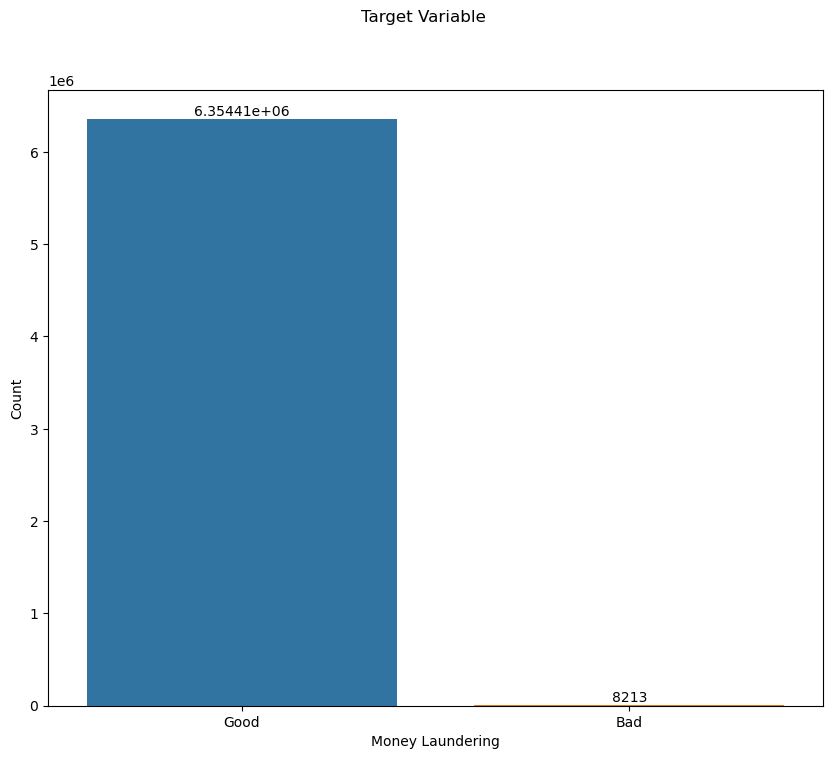

In [8]:
count, ax = plt.subplots(figsize=(10,8))
ax = sns.countplot(x="AML_Label", data=aml_df)
ax.set_xlabel("Money Laundering")
ax.set_ylabel("Count")
plt.suptitle("Target Variable", fontsize="large")
#plt.title("Figure 2.1", fontsize="medium")
plt.bar_label(ax.containers[0])
plt.show()

#### Figure 2.2
Displays the average transaction amount by if money laundering, which shows a larger dollar amount associated with money laundering transactions.

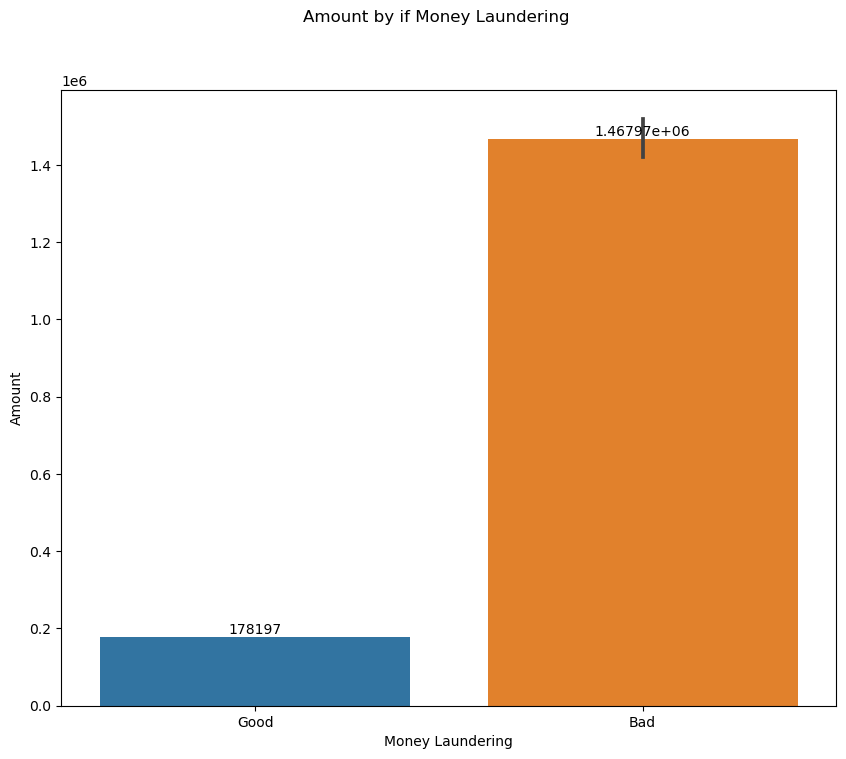

In [9]:
bar, ax = plt.subplots(figsize=(10,8))
ax = sns.barplot(x="AML_Label", y="Amount", data=aml_df)
ax.set_xlabel("Money Laundering")
ax.set_ylabel("Amount")
plt.suptitle("Amount by if Money Laundering", fontsize="large")
#plt.title("Figure 2.2", fontsize="medium")
plt.bar_label(ax.containers[0])
plt.show()

#### Figure 2.3
Displays the customers original balance for accounts that were tagged as either good or bad for money laundering, it appears for the accounts tagged as participating in money laundering the balances are twice as much as those which were not.

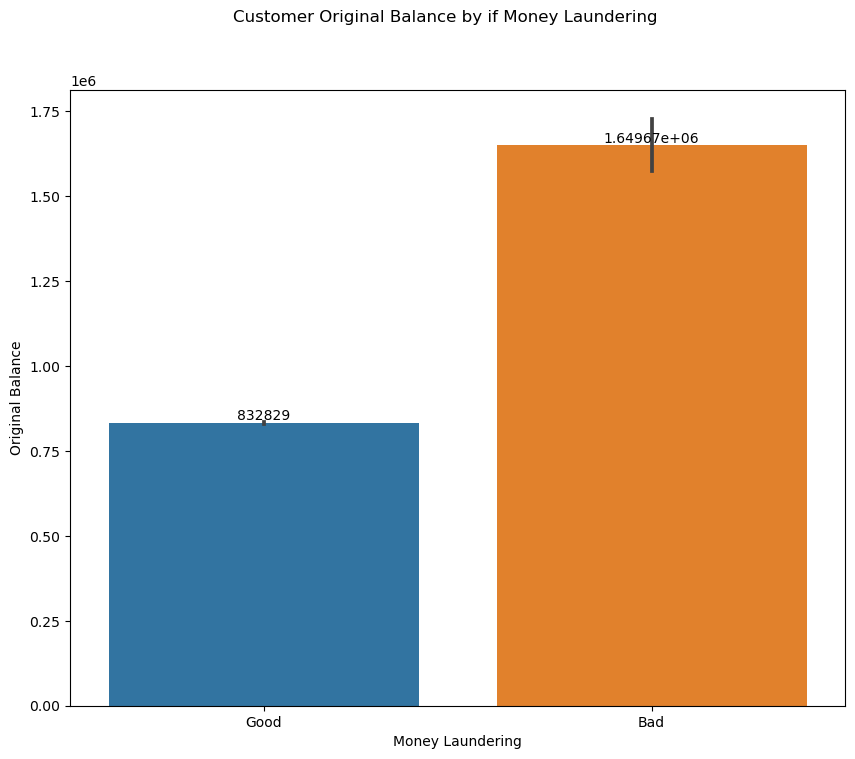

In [10]:
bar, ax = plt.subplots(figsize=(10,8))
ax = sns.barplot(x="AML_Label", y="Cust_Balance_Orig", data=aml_df)
ax.set_xlabel("Money Laundering")
ax.set_ylabel("Original Balance")
plt.suptitle("Customer Original Balance by if Money Laundering", fontsize="large")
#plt.title("Figure 2.3", fontsize="medium")
plt.bar_label(ax.containers[0])
plt.show()

#### Figure 2.4
Displays the customers new balance after the transaction based on if the account was tagged for money laundering, we can see the balance for the money laundering accounts is four times less than for non-money laundering accounts.  Figure 2.3 and 2.4 suggest the customers engaged in money laundering may be emptying the balances of these accounts.

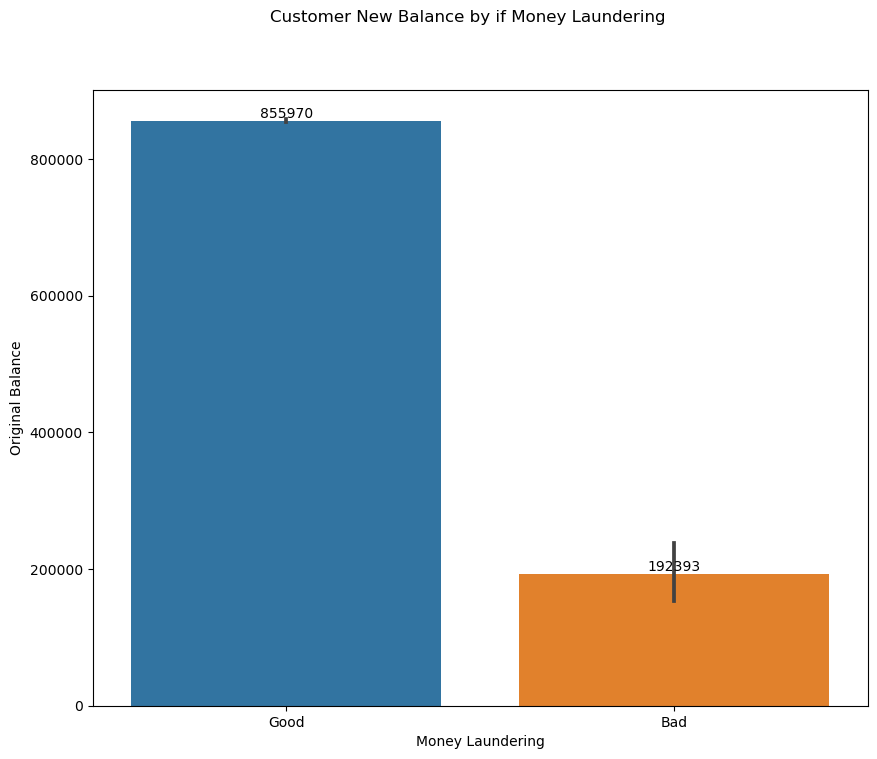

In [11]:
bar, ax = plt.subplots(figsize=(10,8))
ax = sns.barplot(x="AML_Label", y="Cust_Balance_New", data=aml_df)
ax.set_xlabel("Money Laundering")
ax.set_ylabel("Original Balance")
plt.suptitle("Customer New Balance by if Money Laundering", fontsize="large")
#plt.title("Figure 2.4", fontsize="medium")
plt.bar_label(ax.containers[0])
plt.show()

#### Figure 2.5
Displays the original balance of the recipients account prior to the transaction being received, one can see the balance of the accounts not engaged in money laundering is twice as much as those engaged in money laundering.

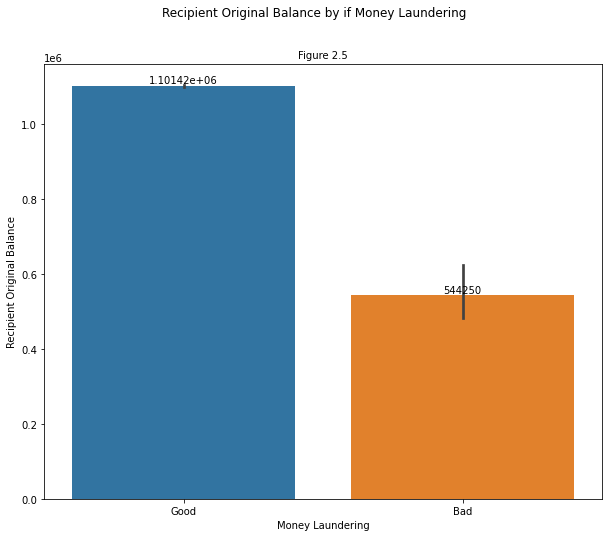

In [33]:
bar, ax = plt.subplots(figsize=(10,8))
ax = sns.barplot(x="AML_Label", y="Rec_Balance_Orig", data=aml_df)
ax.set_xlabel("Money Laundering")
ax.set_ylabel("Recipient Original Balance")
plt.suptitle("Recipient Original Balance by if Money Laundering", fontsize="large")
plt.title("Figure 2.5", fontsize="medium")
plt.bar_label(ax.containers[0])
plt.show()

#### Figure 2.6
Displays the balance of the recipients account after the transaction has occurred, the balances of both the money laundering and money laundering accounts is almost equal.

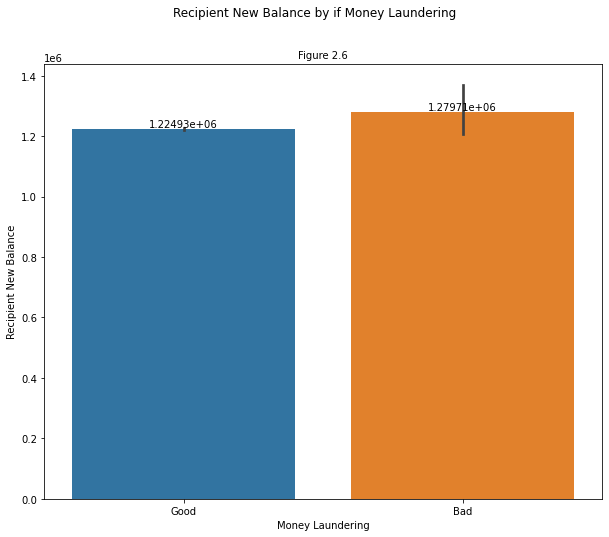

In [34]:
bar, ax = plt.subplots(figsize=(10,8))
ax = sns.barplot(x="AML_Label", y="Rec_Balance_New", data=aml_df)
ax.set_xlabel("Money Laundering")
ax.set_ylabel("Recipient New Balance")
plt.suptitle("Recipient New Balance by if Money Laundering", fontsize="large")
plt.title("Figure 2.6", fontsize="medium")
plt.bar_label(ax.containers[0])
plt.show()

#### Figure 2.7

Displays the accounts engaged in money laundering or not, while also showing how many were flagged as fraud by an existing model.  We can see all transactions identified as fraud by the existing model are also identified as engaging in money laundering.

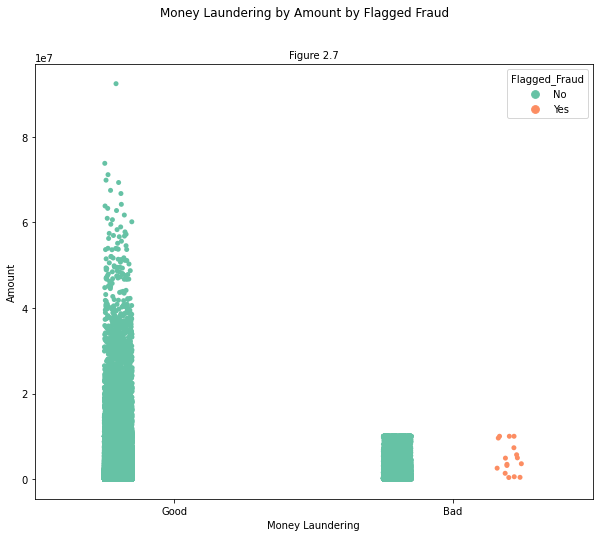

In [35]:
strip, ax = plt.subplots(figsize=(10,8))
ax = sns.stripplot(x="AML_Label", y="Amount", hue="Flagged_Fraud", data=aml_df, palette="Set2", dodge=True)
ax.set_xlabel("Money Laundering")
ax.set_ylabel("Amount")
plt.suptitle("Money Laundering by Amount by Flagged Fraud", fontsize="large")
plt.title("Figure 2.7", fontsize="medium")
plt.show()

### Transaction Type

#### Figure 2.8
Displays the count of each transaction type for the five transaction types in the dataset, we can see the three largest counts for transaction type are payments, cash out and cash in.

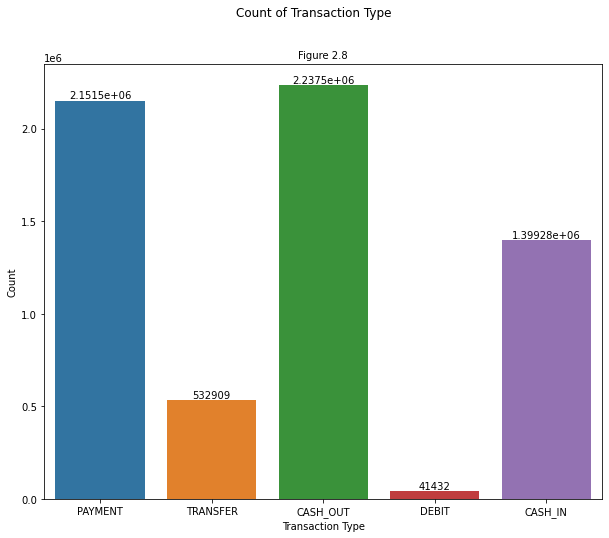

In [36]:
count, ax = plt.subplots(figsize=(10,8))
ax = sns.countplot(x="Transaction_Type", data=aml_df)
ax.set_xlabel("Transaction Type")
ax.set_ylabel("Count")
plt.suptitle("Count of Transaction Type", fontsize="large")
plt.title("Figure 2.8", fontsize="medium")
plt.bar_label(ax.containers[0])
plt.show()

#### Figure 2.9
Displays the count by transaction type by if the transaction was flagged as engaged in money laundering.  One can see the transaction types flagged as money laundering are transfers and cash out, while the other three transaction types have no accounts flagged.

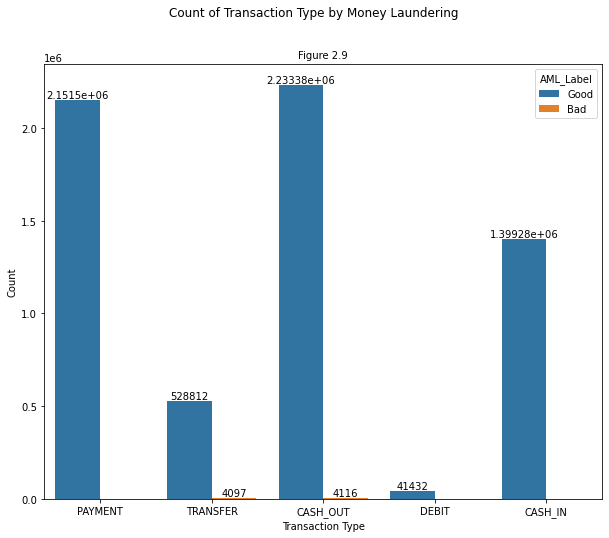

In [37]:
count, ax = plt.subplots(figsize=(10,8))
ax = sns.countplot(x="Transaction_Type", hue="AML_Label", data=aml_df)
ax.set_xlabel("Transaction Type")
ax.set_ylabel("Count")
plt.suptitle("Count of Transaction Type by Money Laundering", fontsize="large")
plt.title("Figure 2.9", fontsize="medium")
plt.bar_label(ax.containers[0])
plt.bar_label(ax.containers[1])
plt.show()

#### Figure 2.10
Displays the transaction type by the dollar amount and if flagged as money laundering, we can see the dollar amount for the transfer transaction type is higher than all other transaction types.  Additionally the dollar amount for cash out transactions tagged as money laundering appear to be three times as much as those not tagged as money laundering.

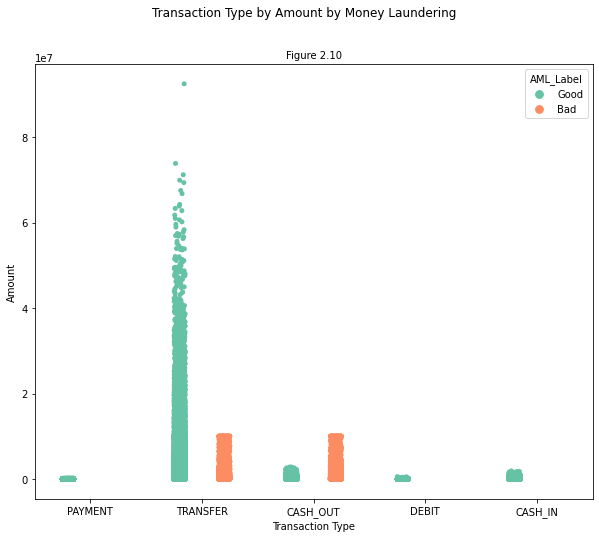

In [38]:
strip, ax = plt.subplots(figsize=(10,8))
ax = sns.stripplot(x="Transaction_Type", y="Amount", hue="AML_Label", data=aml_df, palette="Set2", dodge=True)
ax.set_xlabel("Transaction Type")
ax.set_ylabel("Amount")
plt.suptitle("Transaction Type by Amount by Money Laundering", fontsize="large")
plt.title("Figure 2.10", fontsize="medium")
plt.show()

### Customer Original Balance

#### Figure 2.11
Displays the transaction types by the customers original balance by if they were flagged as engaged in money laundering.  As discussed previoulsy only two transaction types, transfer and cash out have tagged money laundering transactions.  We can see the customers original balance for these two transaction types is higher for those tagged as money laundering transactions.  

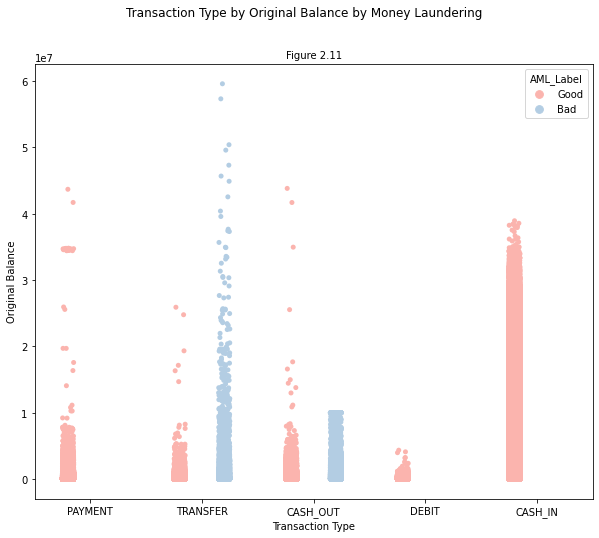

In [39]:
strip, ax = plt.subplots(figsize=(10,8))
ax = sns.stripplot(x="Transaction_Type", y="Cust_Balance_Orig", hue="AML_Label", data=aml_df, palette="Pastel1", dodge=True)
ax.set_title("Transaction Type by Original Balance by Money Laundering")
ax.set_xlabel("Transaction Type")
ax.set_ylabel("Original Balance")
plt.suptitle("Transaction Type by Original Balance by Money Laundering", fontsize="large")
plt.title("Figure 2.11", fontsize="medium")
plt.show()

#### Figure 2.12
Displays the customers original balance by the recipients original balance, and we can see the accounts tagged as engaged in money laundering appear to have a smaller original balance in the recipients account regardless of the balance in the customers account.

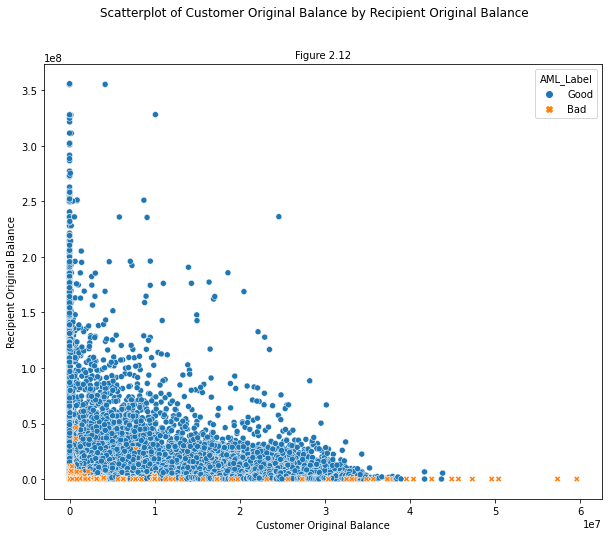

In [40]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.scatterplot(data=aml_df, x="Cust_Balance_Orig", y="Rec_Balance_Orig", hue="AML_Label", style="AML_Label")
plt.suptitle("Scatterplot of Customer Original Balance by Recipient Original Balance", fontsize="large")
plt.title("Figure 2.12", fontsize="medium")
ax.set_xlabel("Customer Original Balance")
ax.set_ylabel("Recipient Original Balance")
plt.show()

#### Figure 2.13
Displays a scatterplot of the customers original balance by the customers new balance, which shows for accounts tagged for money laundering when the customers original balance increases by approximately \\$100,000 the customers new balance increases by approximately \\$100,000 less.

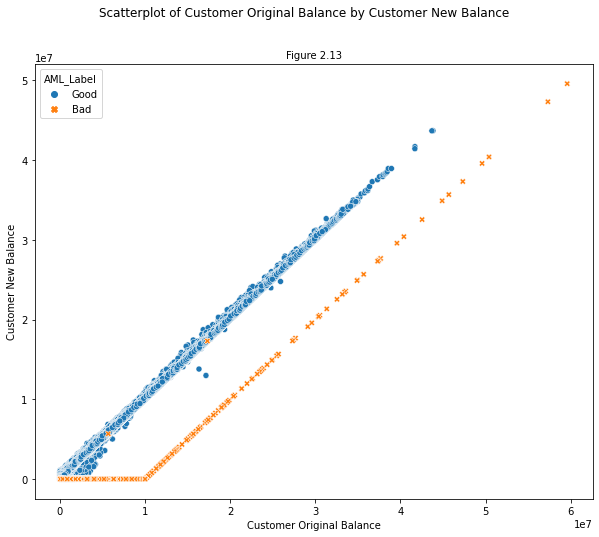

In [41]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.scatterplot(data=aml_df, x="Cust_Balance_Orig", y="Cust_Balance_New", hue="AML_Label", style="AML_Label")
plt.suptitle("Scatterplot of Customer Original Balance by Customer New Balance", fontsize="large")
plt.title("Figure 2.13", fontsize="medium")
ax.set_xlabel("Customer Original Balance")
ax.set_ylabel("Customer New Balance")
plt.show()

#### Figure 2.14
Shows that regardless of the balance in the customers account, the balance after the transaction appears to be small for transactions tagged as money laundering when compared with transactions not tagged as money laundering.

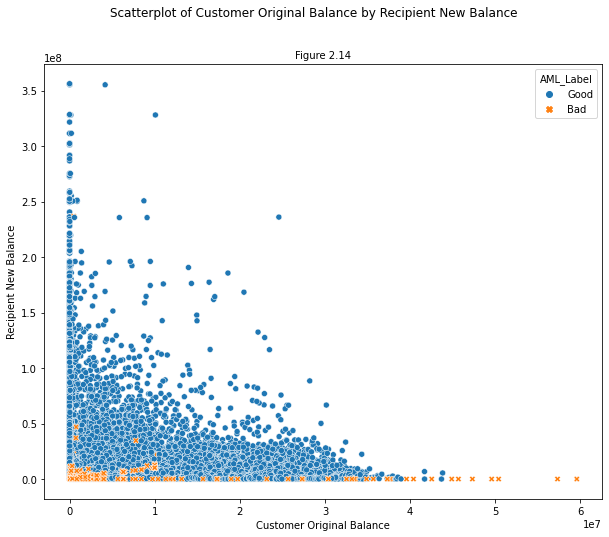

In [42]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.scatterplot(data=aml_df, x="Cust_Balance_Orig", y="Rec_Balance_New", hue="AML_Label", style="AML_Label")
plt.suptitle("Scatterplot of Customer Original Balance by Recipient New Balance", fontsize="large")
plt.title("Figure 2.14", fontsize="medium")
ax.set_xlabel("Customer Original Balance")
ax.set_ylabel("Recipient New Balance")
plt.show()

#### Figure 2.15
Displays the customers original balance over the 31 day period, we can see the balance for the accounts engaged in money laundering are significantly higher than those not engaged in money laundering.

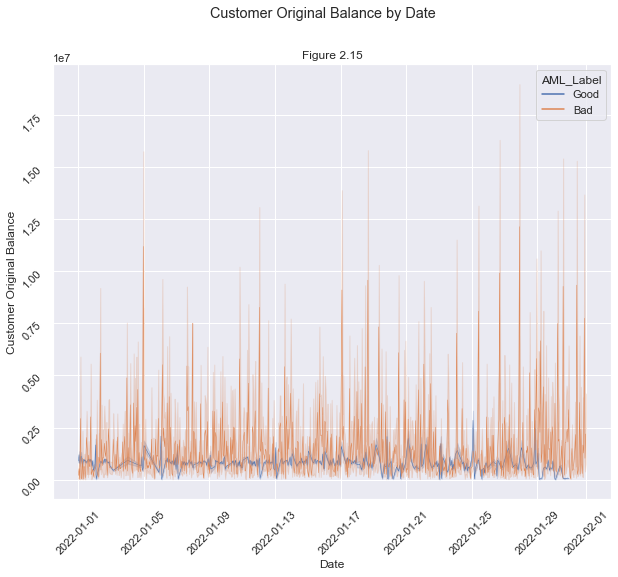

In [128]:
time, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="Date", y="Cust_Balance_Orig", data=aml_df, hue="AML_Label", lw=0.5)
ax.set_xlabel("Date")
ax.set_ylabel("Customer Original Balance")
plt.suptitle("Customer Original Balance by Date", fontsize="large")
plt.title("Figure 2.15", fontsize="medium")
ax.tick_params(rotation=45)
plt.show()

#### Figure 2.16  
Displays the distribution of the customers original balance variable, which shows the customers original balance is not normally distributed and will need to be addressed in our modles.

C:\Users\rewar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Figure 2.16')

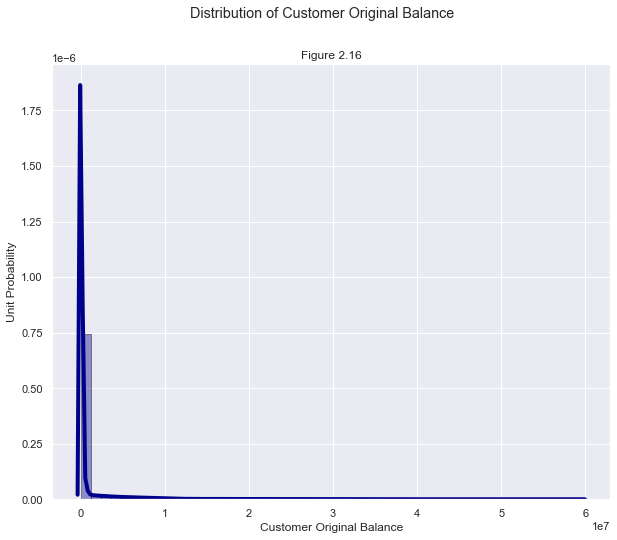

In [123]:
fig, ax = plt.subplots(figsize=(10,8))
sns.distplot(aml_df['Cust_Balance_Orig'], hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_xlabel('Customer Original Balance')
ax.set_ylabel('Unit Probability')
plt.suptitle("Distribution of Customer Original Balance", fontsize="large")
plt.title("Figure 2.16", fontsize="medium")

### Customer New Balance

#### Figure 2.17
Displays the customers new balance after the transaction based on if it was tagged as money laundering or not.  We can see for transfer transactions the new balance for accounts tagged as money laundering is higher, while the new balance for cash out transactions tagged as money laundering is lower.

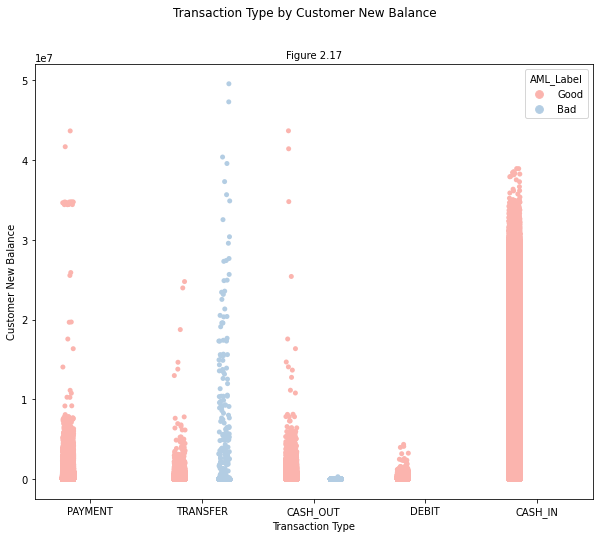

In [16]:
strip, ax = plt.subplots(figsize=(10,8))
ax = sns.stripplot(x="Transaction_Type", y="Cust_Balance_New", hue="AML_Label", data=aml_df, palette="Pastel1", dodge=True)
ax.set_xlabel("Transaction Type")
ax.set_ylabel("Customer New Balance")
plt.suptitle("Transaction Type by Customer New Balance", fontsize="large")
plt.title("Figure 2.17", fontsize="medium")
plt.show()

#### Figure 2.18
Shows the customers new balance over the 31 day time period, for accounts with transactions tagged as money laundering it appears there is a pattern of the accounts maintaining very low new balances with intermittent spikes where the balance increases dramatically.

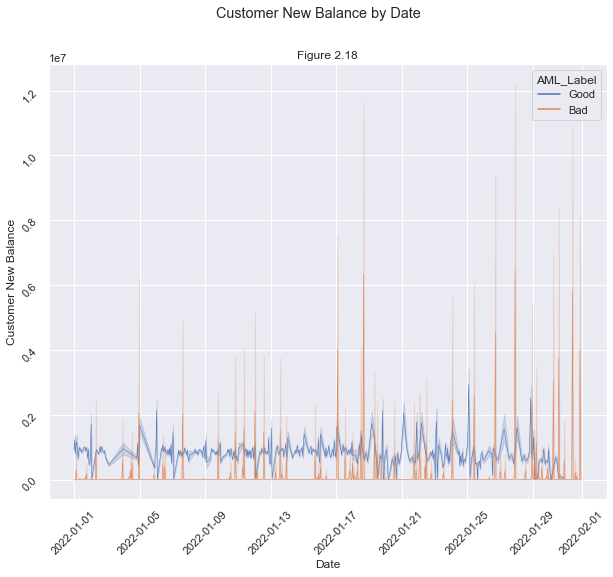

In [129]:
time, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="Date", y="Cust_Balance_New", data=aml_df, hue="AML_Label", lw=0.5)
ax.set_xlabel("Date")
ax.set_ylabel("Customer New Balance")
plt.suptitle("Customer New Balance by Date", fontsize="large")
plt.title("Figure 2.18", fontsize="medium")
ax.tick_params(rotation=45)
plt.show()

#### Figure 2.19
Displays a scatterplot of the customers new balance by the recipients original balance before the transaction has occurred by if it was identified as money laundering.  We can clearly see as the balance of the customers new balance increases and the recipients original balance remains near zero, most of the money laundering transactions fall into this category.

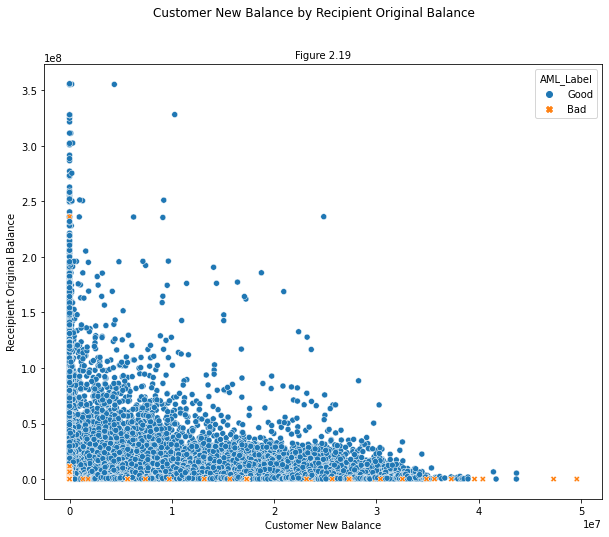

In [19]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.scatterplot(data=aml_df, x="Cust_Balance_New", y="Rec_Balance_Orig", hue="AML_Label", style="AML_Label")
plt.suptitle("Customer New Balance by Recipient Original Balance", fontsize="large")
plt.title("Figure 2.19", fontsize="medium")
ax.set_xlabel("Customer New Balance")
ax.set_ylabel("Receipient Original Balance")
plt.show()

#### Figure 2.20
Displays a scatterplot of the customers new balance by the recipients new balance after the transaction has occurred by if it was identified as money laundering.  We can see as the customers new balance increases and the recipients balance remains near zero, most of the money laundering transactions fall into this category.

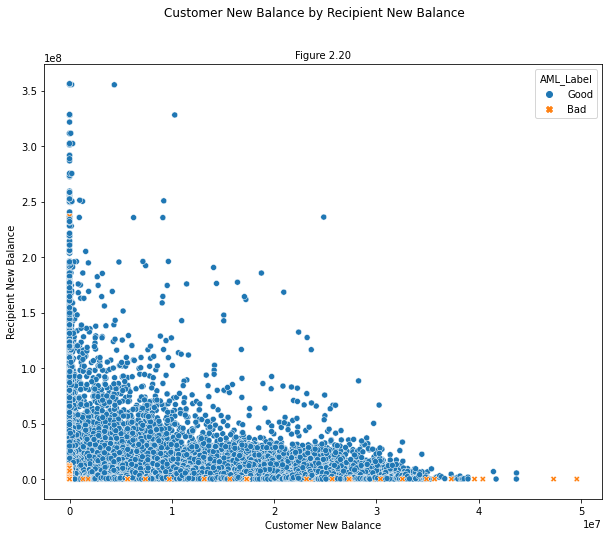

In [20]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.scatterplot(data=aml_df, x="Cust_Balance_New", y="Rec_Balance_New", hue="AML_Label", style="AML_Label")
plt.suptitle("Customer New Balance by Recipient New Balance", fontsize="large")
plt.title("Figure 2.20", fontsize="medium")
ax.set_xlabel("Customer New Balance")
ax.set_ylabel("Recipient New Balance")
plt.show()

#### Figure 2.21
Displays the distribution of the customers new balance, which shows the distribution of the customers new balance is not normally distributed.

C:\Users\rewar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Figure 2.21')

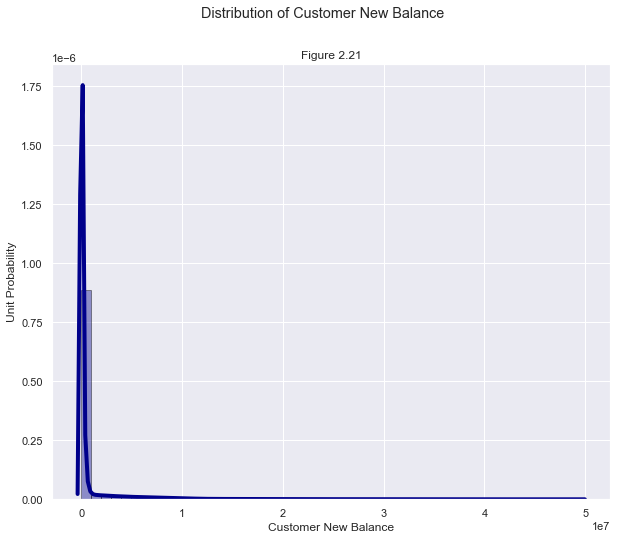

In [124]:
fig, ax = plt.subplots(figsize=(10,8))
sns.distplot(aml_df['Cust_Balance_New'], hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_xlabel('Customer New Balance')
ax.set_ylabel('Unit Probability')
plt.suptitle("Distribution of Customer New Balance", fontsize="large")
plt.title("Figure 2.21", fontsize="medium")

### Recipient Original Balance

#### Figure 2.22
Displays the recipients original balance by each transaction type by if the transaction was money laundering.  Confirms when the recipients original balance is small and the transaction type is Transfer or Cash Out, the transactions tend to be tagged as money laundering.

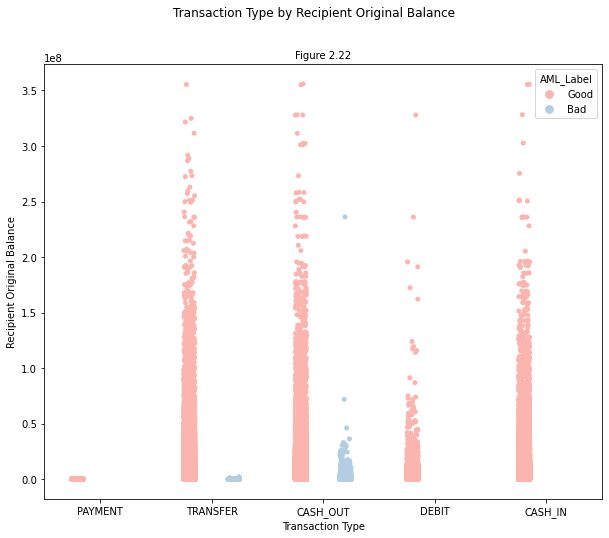

In [34]:
strip, ax = plt.subplots(figsize=(10,8))
ax = sns.stripplot(x="Transaction_Type", y="Rec_Balance_Orig", hue="AML_Label", data=aml_df, palette="Pastel1", dodge=True)
ax.set_title("Transaction Type by Recipient Original Balance")
ax.set_xlabel("Transaction Type")
ax.set_ylabel("Recipient Original Balance")
plt.suptitle("Transaction Type by Recipient Original Balance", fontsize="large")
plt.title("Figure 2.22", fontsize="medium")
plt.show()

#### Figure 2.23
Displays a scatterplot of the recipients original balance by the transaction amount by if the transaction was tagged as money laundering, we can see when the recipients original balance is below \\$200,000 and the transaction amount is below \\$150,000 the transactions are more likely to be tagged as money laundering.

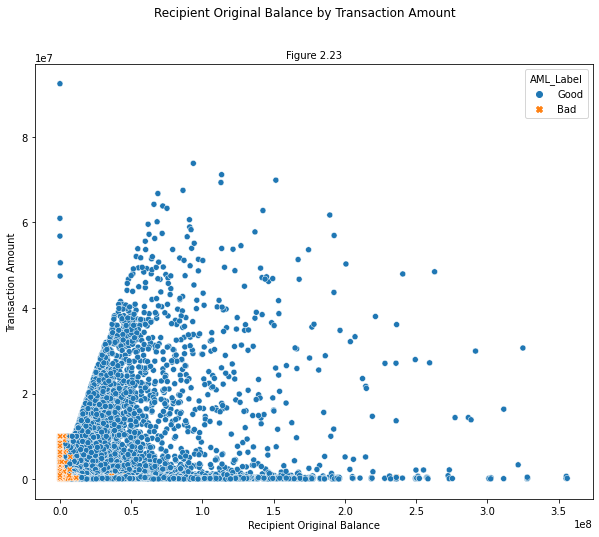

In [35]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.scatterplot(data=aml_df, x="Rec_Balance_Orig", y="Amount", hue="AML_Label", style="AML_Label")
plt.suptitle("Recipient Original Balance by Transaction Amount", fontsize="large")
plt.title("Figure 2.23", fontsize="medium")
ax.set_xlabel("Recipient Original Balance")
ax.set_ylabel("Transaction Amount")
plt.show()

#### Figure 2.24
Displays the recipients original balance over a 31 day period, based on this chart the recipients balance for transactions tagged as money laundering appears to be smaller with intermittent spikes of larger balances. There also appears to be two significant spikes between January 17th and 25th, which might suggest a significant event in this time period.

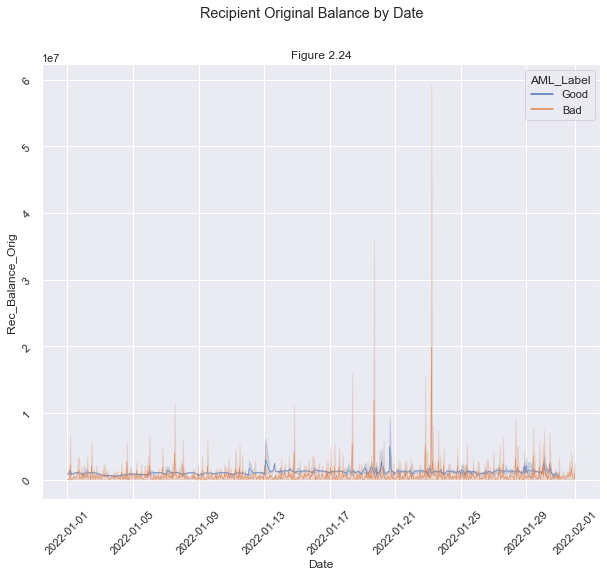

In [130]:
time, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="Date", y="Rec_Balance_Orig", hue="AML_Label", data=aml_df, lw = 0.5)
ax.tick_params(rotation=45)
plt.suptitle("Recipient Original Balance by Date", fontsize="large")
plt.title("Figure 2.24", fontsize="medium")
plt.show()

#### Figure 2.25
Displays the recipients original balance by the recipients new balance by tagged as money laundering, we can see the recipient accounts engaged in money laundering have balances below \\$200,000 for both the original and new balances.

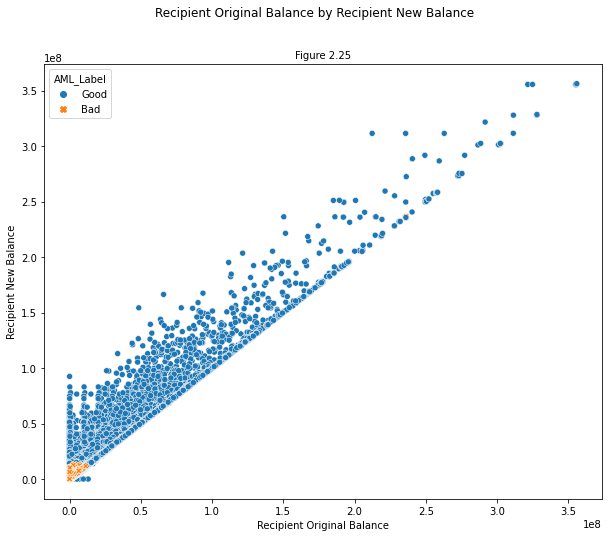

In [37]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.scatterplot(data=aml_df, x="Rec_Balance_Orig", y="Rec_Balance_New", hue="AML_Label", style="AML_Label")
plt.suptitle("Recipient Original Balance by Recipient New Balance", fontsize="large")
plt.title("Figure 2.25", fontsize="medium")
ax.set_xlabel("Recipient Original Balance")
ax.set_ylabel("Recipient New Balance")
plt.show()

#### Figure 2.26

Displays the distribution of the recipients balance, which shows the distribution is not normally distributed and will need to be addressed in our models.

C:\Users\rewar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Figure 2.26')

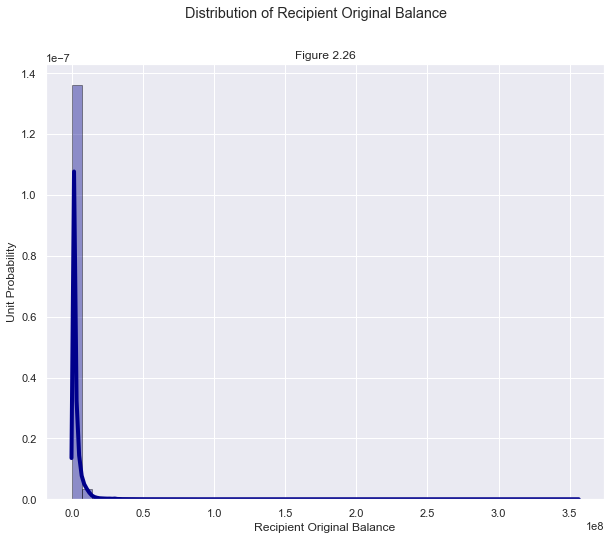

In [125]:
fig, ax = plt.subplots(figsize=(10,8))
sns.distplot(aml_df['Rec_Balance_Orig'], hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_xlabel('Recipient Original Balance')
ax.set_ylabel('Unit Probability')
plt.suptitle("Distribution of Recipient Original Balance", fontsize="large")
plt.title("Figure 2.26", fontsize="medium")

### Recipient New Balance

#### Figure 2.27
Displays the recipients new balance by transaction type, we can see the new recipient balance for the transactions tagged as money laundering is significantly lower than those not tagged as money laundering.

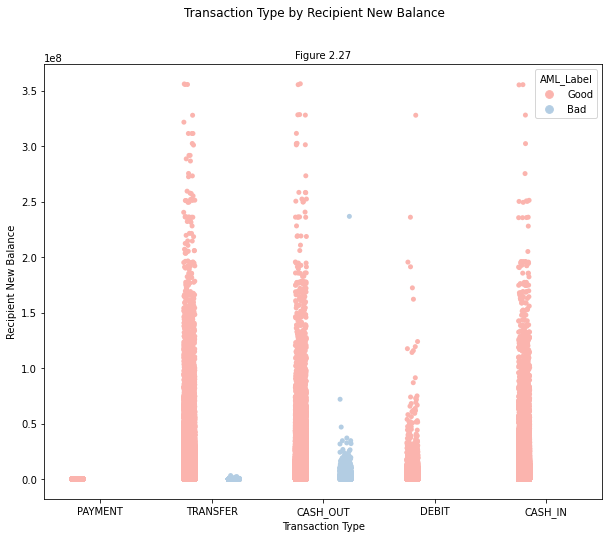

In [39]:
strip, ax = plt.subplots(figsize=(10,8))
ax = sns.stripplot(x="Transaction_Type", y="Rec_Balance_New", hue="AML_Label", data=aml_df, palette="Pastel1", dodge=True)
ax.set_xlabel("Transaction Type")
ax.set_ylabel("Recipient New Balance")
plt.suptitle("Transaction Type by Recipient New Balance", fontsize="large")
plt.title("Figure 2.27", fontsize="medium")
plt.show()

#### Figure 2.28
Displays a scatterplot of the recipients new balance by the transaction amount by if the transaction was tagged as money laundering or not.  We can see the majority of transactions tagged as money laundering occur when the receipients new balance is below \\$200,000 and the transaction amount is below \\$200,000.

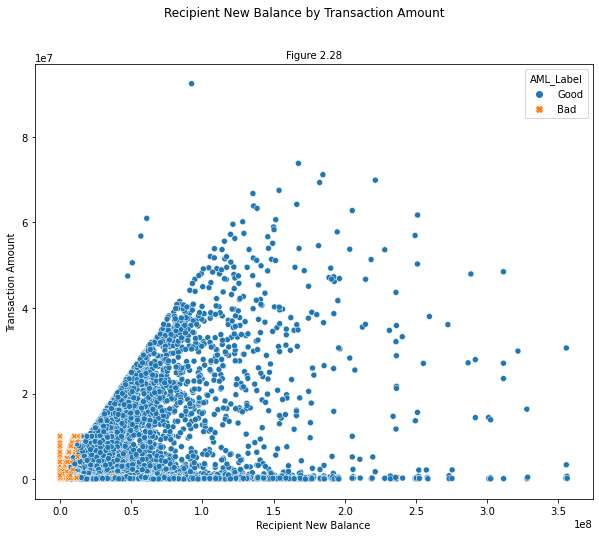

In [40]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.scatterplot(data=aml_df, x="Rec_Balance_New", y="Amount", hue="AML_Label", style="AML_Label")
plt.suptitle("Recipient New Balance by Transaction Amount", fontsize="large")
plt.title("Figure 2.28", fontsize="medium")
ax.set_xlabel("Recipient New Balance")
ax.set_ylabel("Transaction Amount")
plt.show()

#### Figure 2.29
Displays the distribution of the recipients new balance, which shows the distribution is not normally distributed and will need to be addressed in our models.

C:\Users\rewar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Figure 2.29')

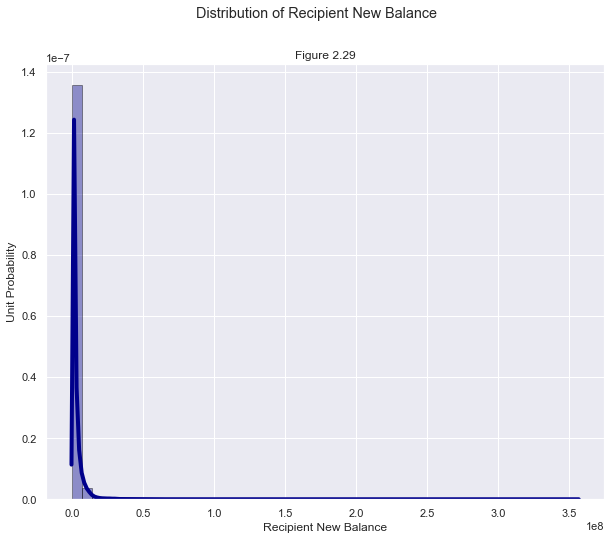

In [126]:
fig, ax = plt.subplots(figsize=(10,8))
sns.distplot(aml_df['Rec_Balance_New'], hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_xlabel('Recipient New Balance')
ax.set_ylabel('Unit Probability')
plt.suptitle("Distribution of Recipient New Balance", fontsize="large")
plt.title("Figure 2.29", fontsize="medium")

#### Figure 2.30
Shows the recipients new balance over the 31 day time period, for accounts with transactions tagged as money laundering it appears there is a pattern of the account balance varying significantly, while those not tagged as money laundering appear to maintain a more consistent balance. 

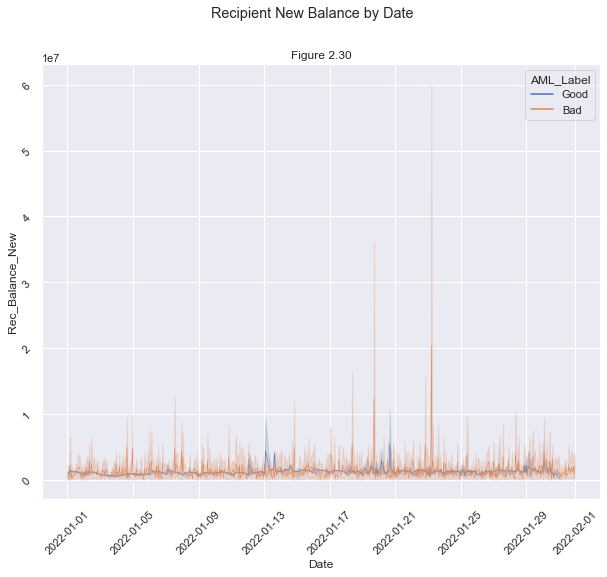

In [132]:
time, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="Date", y="Rec_Balance_New", hue="AML_Label", data=aml_df, lw = 0.5)
ax.tick_params(rotation=45)
plt.suptitle("Recipient New Balance by Date", fontsize="large")
plt.title("Figure 2.30", fontsize="medium")
plt.show()

### Amount

#### Figure 2.31
Displays the transaction amount for every transaction over the 31 day time period, we can see the total amount of transactions tagged as money laundering appear to total a much higher amount than the transactions which are tagged as not money laundering.  Those transactions appear to be more consistent in the transaction amount without much fluctuation.

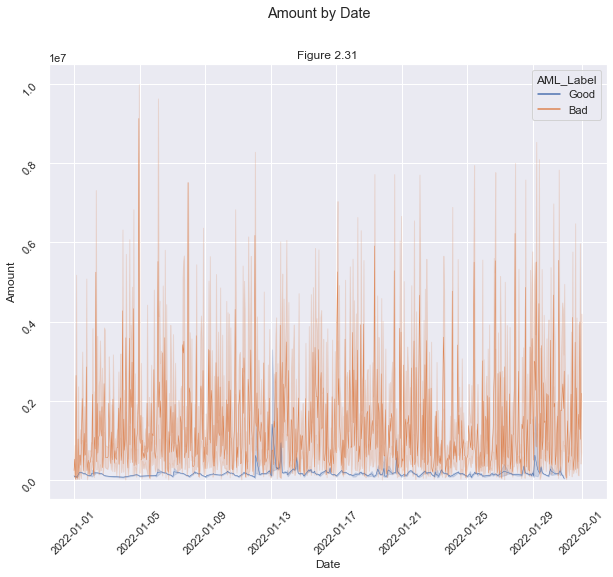

In [133]:
time, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="Date", y="Amount", hue="AML_Label", data=aml_df, lw=0.5)
plt.suptitle("Amount by Date", fontsize="large")
plt.title("Figure 2.31", fontsize="medium")
ax.tick_params(rotation=45)
plt.show()

#### Figure 2.32
Displays the distribution of amount, which shows the distribution of transaction amount is not normally distributed and should be addressed in our models.

C:\Users\rewar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Figure 2.32')

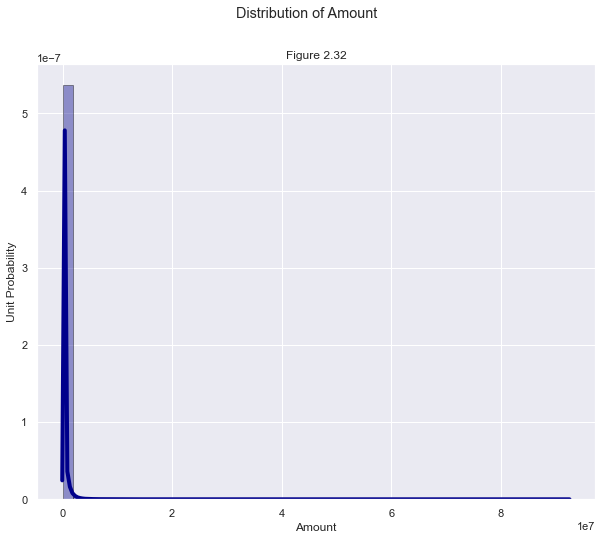

In [134]:
fig, ax = plt.subplots(figsize=(10,8))
sns.distplot(aml_df['Amount'], hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_xlabel('Amount')
ax.set_ylabel('Unit Probability')
plt.suptitle("Distribution of Amount", fontsize="large")
plt.title("Figure 2.32", fontsize="medium")

### Flagged Fraud

#### Figure 2.33
Displays the transaction type by the transaction amount by if the transaction was flagged as fraud.  We can see all the transactions tagged as fraud are transfer transactions and we will need to explore further.

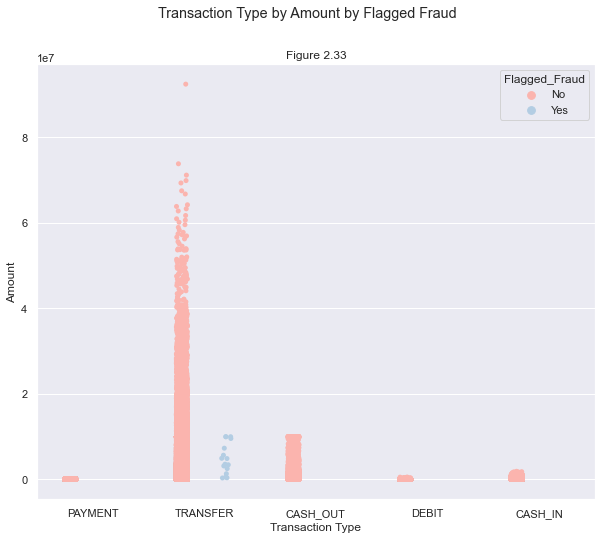

In [135]:
strip, ax = plt.subplots(figsize=(10,8))
ax = sns.stripplot(x="Transaction_Type", y="Amount", hue="Flagged_Fraud", data=aml_df, palette="Pastel1", dodge=True)
plt.suptitle("Transaction Type by Amount by Flagged Fraud", fontsize="large")
plt.title("Figure 2.33", fontsize="medium")
ax.set_xlabel("Transaction Type")
ax.set_ylabel("Amount")
plt.show()

### New Variables  
Based on the results of the visualizations above, there are some interactions between the variables which indicate those transactions are more likely to be involved with money laundering.  We will then create visualizations to determine how these new variables interact with our existing variables.

#### Customers Original Balance and Customers New Balance  
Figures 2.3 and 2.4, show that the customers balance does not shift dramatically between the original and new balances when the transaction is tagged as money laundering.  When we look at the same figures for when the transaction is not engaged in money laundering, the customers original balance prior to the transaction appears to be much higher than after.  This would suggest for these transactions there is a large movement of money between these accounts.

In [9]:
aml_df["COB_CNB_eq100"] = ((aml_df["Cust_Balance_Orig"] - aml_df["Cust_Balance_New"]) == 100000)
aml_df["COB_CNB_eq100"] = np.where(aml_df["COB_CNB_eq100"]==True, "Yes", "No")
aml_df["COB_CNB_eq100"]

0          No
1          No
2          No
3          No
4          No
           ..
6362615    No
6362616    No
6362617    No
6362618    No
6362619    No
Name: COB_CNB_eq100, Length: 6362620, dtype: object

#### Figure 2.34
Displays the new variable for if the customers new balance subtracted from the customers original balance is greater than \\$100,000, by if the transaction was flagged as fraud and transaction amount.

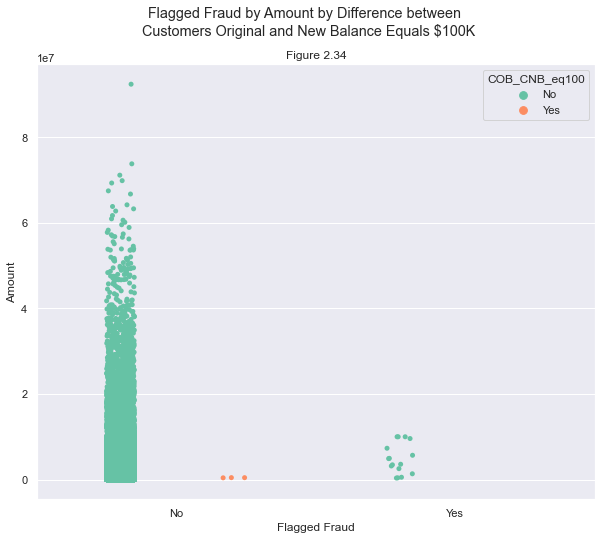

In [137]:
strip, ax = plt.subplots(figsize=(10,8))
ax = sns.stripplot(x="Flagged_Fraud", y="Amount", hue="COB_CNB_eq100", data=aml_df, palette="Set2", dodge=True)
plt.suptitle("Flagged Fraud by Amount by Difference between \n Customers Original and New Balance Equals $100K", fontsize="large")
plt.title("Figure 2.34", fontsize="medium")
ax.set_xlabel("Flagged Fraud")
ax.set_ylabel("Amount")
plt.show()

#### Figure 2.35
Displays the new variable for if the customers new balance subtracted from the customers original balance is greater than \\$100,000, by if the transaction was tagged as money laundering and transaction amount.

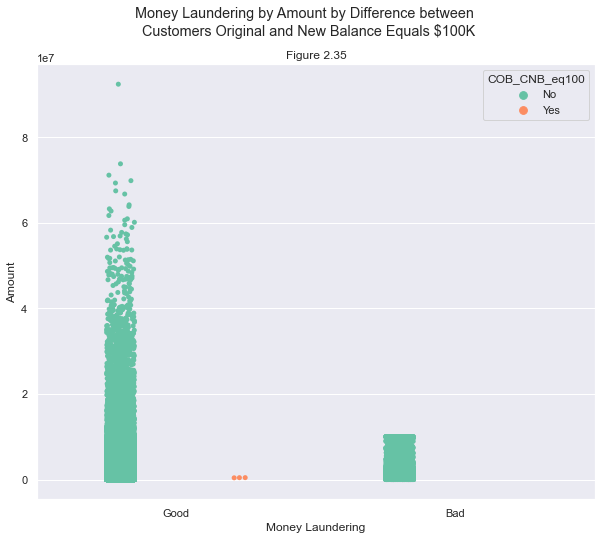

In [138]:
strip, ax = plt.subplots(figsize=(10,8))
ax = sns.stripplot(x="AML_Label", y="Amount", hue="COB_CNB_eq100", data=aml_df, palette="Set2", dodge=True)
plt.suptitle("Money Laundering by Amount by Difference between \n Customers Original and New Balance Equals $100K", fontsize="large")
plt.title("Figure 2.35", fontsize="medium")
ax.set_xlabel("Money Laundering")
ax.set_ylabel("Amount")
plt.show()

#### Recipients Original Balance, Recipient New Balance and Transaction Amount  

Figures 2.12, 2.19, and 2.23 all show when the recipients original balance is less than \\$200,000 then the transaction is more likely to be tagged as money laundering.  Similarly, Figures 2.14, 2.20, and 2.25 show when the recipients new balance is less than \\$200,000 then the transaction is more likely to be tagged as money laundering. Figures 2.10, 2.23, and 2.28 all display when the transaction amount is below \\$150,000 it is more likely to be tagged as money laundering.  Based on these three factors, we will create a new variable which will return a True or False if the recipients original balance and new balance are both below \\$200,000 and the transaction amount is below \\$150,000.  We will then convert the boolean response to a "yes" or "no" categorical variable.

In [10]:
aml_df["ROB_RNB_lt200_Tran_lt150"] = ((aml_df["Rec_Balance_Orig"]<200000) & (aml_df["Rec_Balance_New"]<200000) & 
                                      (aml_df["Amount"]<150000))
aml_df["ROB_RNB_lt200_Tran_lt150"] = np.where(aml_df["ROB_RNB_lt200_Tran_lt150"]==True, "Yes", "No")
aml_df["ROB_RNB_lt200_Tran_lt150"]

0          Yes
1          Yes
2          Yes
3          Yes
4          Yes
          ... 
6362615     No
6362616     No
6362617     No
6362618     No
6362619     No
Name: ROB_RNB_lt200_Tran_lt150, Length: 6362620, dtype: object

#### Figure 2.36     
Displays the new variable for if the recipients original and new balances were less than \\$200,000 and transaction amount less than \\$150,000, by if the transaction was flagged as fraud and transaction amount.

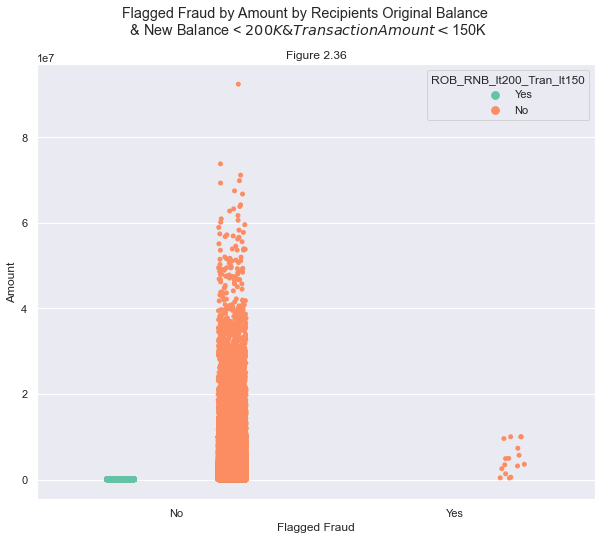

In [140]:
strip, ax = plt.subplots(figsize=(10,8))
ax = sns.stripplot(x="Flagged_Fraud", y="Amount", hue="ROB_RNB_lt200_Tran_lt150", data=aml_df, palette="Set2", dodge=True)
plt.suptitle("Flagged Fraud by Amount by Recipients Original Balance \n & New Balance < $200K & Transaction Amount < $150K", fontsize="large")
plt.title("Figure 2.36", fontsize="medium")
ax.set_xlabel("Flagged Fraud")
ax.set_ylabel("Amount")
plt.show()

#### Figure 2.37     
Displays the new variable for if the recipients original balance and recipients new balance were less than \\$200,000 and transaction amount less than \\$150,000, by if the transaction was tagged as money laundering and transaction amount.

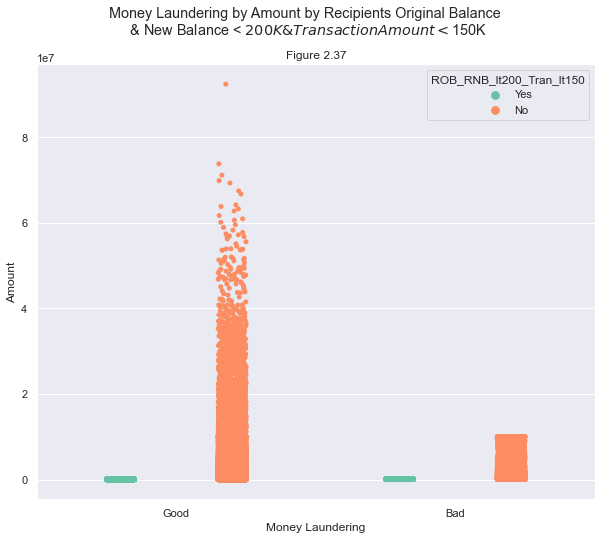

In [141]:
strip, ax = plt.subplots(figsize=(10,8))
ax = sns.stripplot(x="AML_Label", y="Amount", hue="ROB_RNB_lt200_Tran_lt150", data=aml_df, palette="Set2", dodge=True)
plt.suptitle("Money Laundering by Amount by Recipients Original Balance \n & New Balance < $200K & Transaction Amount < $150K", fontsize="large")
plt.title("Figure 2.37", fontsize="medium")
ax.set_xlabel("Money Laundering")
ax.set_ylabel("Amount")
plt.show()

#### Recipient Original and Recipient New Balance
Figure 2.25 shows when the recipients original and recipient new balance are both below \\$100,000 the transaction is tagged as money laundering.  Based on this information, we will create a new variable which will return a True or False if the recipients original and new balances are both below \\$100,000, we will then convert the boolean response to a "yes" or "no" categorical variable.

In [11]:
aml_df["ROB_RNB_gt100"] = ((aml_df["Rec_Balance_New"] - aml_df["Rec_Balance_Orig"]) > 100000)
aml_df["ROB_RNB_gt100"] = np.where(aml_df["ROB_RNB_gt100"]==True, "Yes", "No")
aml_df["ROB_RNB_gt100"]

0           No
1           No
2           No
3           No
4           No
          ... 
6362615    Yes
6362616     No
6362617    Yes
6362618     No
6362619    Yes
Name: ROB_RNB_gt100, Length: 6362620, dtype: object

#### Figure 2.38
Displays the new variable for if the difference in the recipients original balance and recipient new balance was greater than \\$100,000, by if the transaction was flagged as fraud and transaction amount.

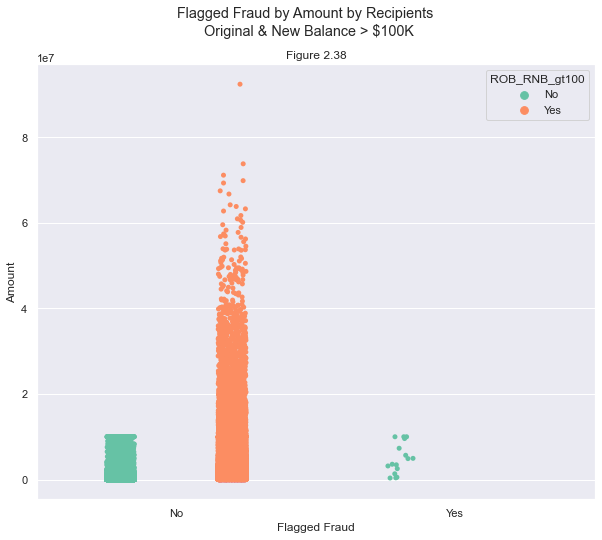

In [143]:
strip, ax = plt.subplots(figsize=(10,8))
ax = sns.stripplot(x="Flagged_Fraud", y="Amount", hue="ROB_RNB_gt100", data=aml_df, palette="Set2", dodge=True)
plt.suptitle("Flagged Fraud by Amount by Recipients \n Original & New Balance > $100K", fontsize="large")
plt.title("Figure 2.38", fontsize="medium")
ax.set_xlabel("Flagged Fraud")
ax.set_ylabel("Amount")
plt.show()

#### Figure 2.39
Displays the new variable for if the difference in the recipients original balance and recipient new balance was greater than \\$100,000, by if the transaction was tagged as money laundering and transaction amount.

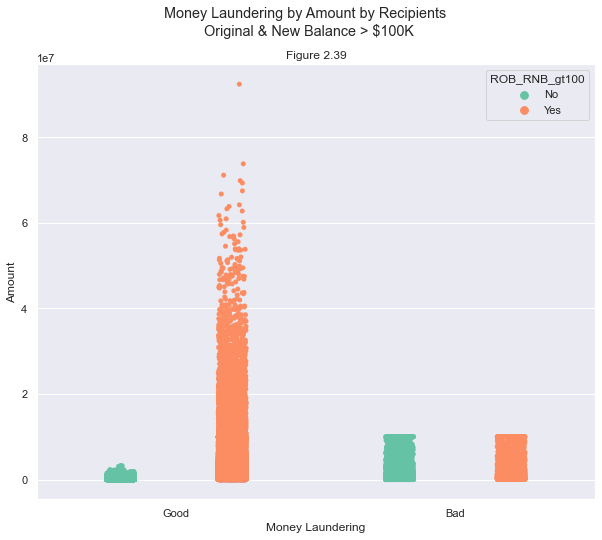

In [144]:
strip, ax = plt.subplots(figsize=(10,8))
ax = sns.stripplot(x="AML_Label", y="Amount", hue="ROB_RNB_gt100", data=aml_df, palette="Set2", dodge=True)
plt.suptitle("Money Laundering by Amount by Recipients \n Original & New Balance > $100K", fontsize="large")
plt.title("Figure 2.39", fontsize="medium")
ax.set_xlabel("Money Laundering")
ax.set_ylabel("Amount")
plt.show()

### Correlation Matrix
We will create a correlation matrix to determine if there are any strong relationships between the variables.

#### Change the categorical variables from string to quantitative
For the five categorical variables we will include in the correlation matrix, we will change them from string format to quantitative format.

In [12]:
aml_df["AML_Label"] = np.where(aml_df["AML_Label"]=="Good", 0, 1)
aml_df["Flagged_Fraud"] = np.where(aml_df["Flagged_Fraud"]=="No", 0, 1)
aml_df["COB_CNB_eq100"] = np.where(aml_df["COB_CNB_eq100"]=="No", 0, 1)
aml_df["ROB_RNB_lt200_Tran_lt150"] = np.where(aml_df["ROB_RNB_lt200_Tran_lt150"]=="No", 0, 1)
aml_df["ROB_RNB_gt100"] = np.where(aml_df["ROB_RNB_gt100"]=="No", 0, 1)

#### Generate the correlation matrix
We construct the correlation matrix, with all the quantitative variables and the five qualitative variables we transformed above.  As we anticipated with the visualizations above, it appears there is a strong correlation between the transaction amount and the recipients original and new balances.  Similarly, there is a strong correlation between the customers original and new balances and the recipients original and new balances.

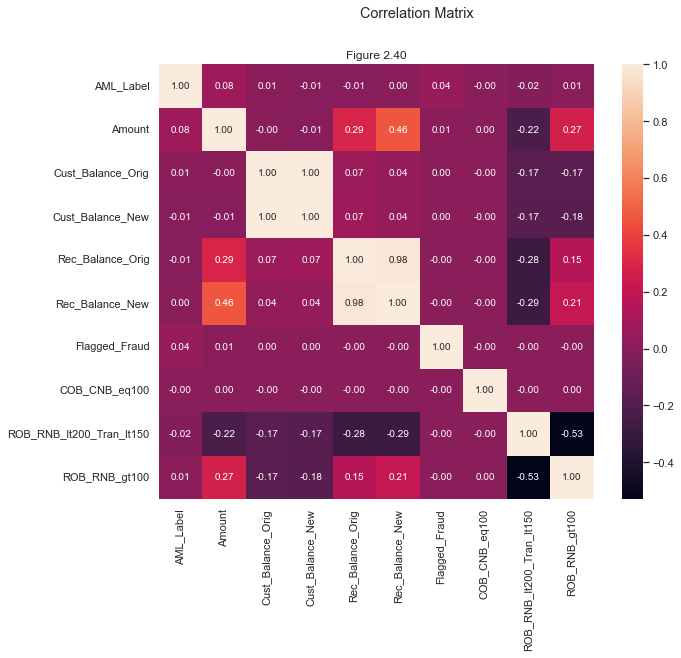

In [146]:
cm = np.corrcoef(aml_df[['AML_Label', 'Amount', 'Cust_Balance_Orig', 'Cust_Balance_New', 'Rec_Balance_Orig', 'Rec_Balance_New', 
                         'Flagged_Fraud', 'COB_CNB_eq100', 'ROB_RNB_lt200_Tran_lt150','ROB_RNB_gt100']].values.T)
fig, ax = plt.subplots(figsize=(10,8))
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, 
                 yticklabels=aml_df[['AML_Label', 'Amount', 'Cust_Balance_Orig', 'Cust_Balance_New', 'Rec_Balance_Orig', 
                                     'Rec_Balance_New', 'Flagged_Fraud', 'COB_CNB_eq100', 'ROB_RNB_lt200_Tran_lt150',
                                     'ROB_RNB_gt100', ]].columns, 
                 xticklabels=aml_df[['AML_Label', 'Amount', 'Cust_Balance_Orig', 'Cust_Balance_New', 'Rec_Balance_Orig', 
                                     'Rec_Balance_New', 'Flagged_Fraud', 'COB_CNB_eq100', 'ROB_RNB_lt200_Tran_lt150',
                                     'ROB_RNB_gt100', ]].columns)
plt.suptitle("Correlation Matrix", fontsize="large")
plt.title("Figure 2.40", fontsize="medium")
plt.show()

## Cluster Analysis
We will perform cluster analysis to determine if there are any significant insights which can be gained through identifying unique clusters in the dataset.  Based on these insights we may be able to partition our data into distinct clusters which we can use the distinct characteristics from these clusters to create a better model.  

### Create dummy variables for the Transaction_Type variable  
There are five different transaction types which are included in the Transaction_Type variable, since these are not ranked categories we cannot use a 1 to 5 numerical value for the Transaction_Type variable.  Instead we will create dummy variables for each of the transaction types, while excluding one of the five since we can assume if the transaction type is not in the first four it will be the last transaction type.  

In [13]:
aml_df = pd.get_dummies(aml_df, columns=['Transaction_Type'], prefix='trans_', drop_first=True)
aml_df.head()

,Date,Amount,Customer_ID,Cust_Balance_Orig,Cust_Balance_New,Recipient_ID,Rec_Balance_Orig,Rec_Balance_New,AML_Label,Flagged_Fraud,COB_CNB_eq100,ROB_RNB_lt200_Tran_lt150,ROB_RNB_gt100,trans__CASH_OUT,trans__DEBIT,trans__PAYMENT,trans__TRANSFER
0,2022-01-01,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,1,0,0,0,1,0
1,2022-01-01,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,1,0,0,0,1,0
2,2022-01-01,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,1,0,0,0,0,1
3,2022-01-01,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0,1,0,1,0,0,0
4,2022-01-01,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,1,0,0,0,1,0


### Reorder the Columns  
To complete the next several sections, we will change the order of the columns so these tasks can be performed more easily.  We will also drop the Date, Customer_ID, and Recipient_ID as these variables will not be used in the cluster analysis or feature selection.  The Date will be dropped due in part because we do not want to add 30 additional categorical variables and create uninteded noise in our models.  The Customer_ID and Recipient_ID are both being dropped for similar reasons, where the number of unique customers would create potentially millions of categorical variables and would introduce unintended noise in our dataset. 

In [14]:
cols = ['Amount', 'Cust_Balance_Orig', 'Cust_Balance_New', 'Rec_Balance_Orig', 'Rec_Balance_New', 'Flagged_Fraud',
        'COB_CNB_eq100', 'ROB_RNB_lt200_Tran_lt150', 'ROB_RNB_gt100', 'trans__CASH_OUT', 'trans__DEBIT',
        'trans__PAYMENT', 'trans__TRANSFER', 'AML_Label']
aml_df = aml_df[cols]
aml_df.head()

,Amount,Cust_Balance_Orig,Cust_Balance_New,Rec_Balance_Orig,Rec_Balance_New,Flagged_Fraud,COB_CNB_eq100,ROB_RNB_lt200_Tran_lt150,ROB_RNB_gt100,trans__CASH_OUT,trans__DEBIT,trans__PAYMENT,trans__TRANSFER,AML_Label
0,9839.64,170136.0,160296.36,0.0,0.0,0,0,1,0,0,0,1,0,0
1,1864.28,21249.0,19384.72,0.0,0.0,0,0,1,0,0,0,1,0,0
2,181.00,181.0,0.00,0.0,0.0,0,0,1,0,0,0,0,1,1
3,181.00,181.0,0.00,21182.0,0.0,0,0,1,0,1,0,0,0,1
4,11668.14,41554.0,29885.86,0.0,0.0,0,0,1,0,0,0,1,0,0


### Create the X and y dataframes   
We will now create the X and y dataframes, which splits the dataframe between our independent variables and the target variable.

In [15]:
X = aml_df.iloc[:, :-1]
X.head()

,Amount,Cust_Balance_Orig,Cust_Balance_New,Rec_Balance_Orig,Rec_Balance_New,Flagged_Fraud,COB_CNB_eq100,ROB_RNB_lt200_Tran_lt150,ROB_RNB_gt100,trans__CASH_OUT,trans__DEBIT,trans__PAYMENT,trans__TRANSFER
0,9839.64,170136.0,160296.36,0.0,0.0,0,0,1,0,0,0,1,0
1,1864.28,21249.0,19384.72,0.0,0.0,0,0,1,0,0,0,1,0
2,181.00,181.0,0.00,0.0,0.0,0,0,1,0,0,0,0,1
3,181.00,181.0,0.00,21182.0,0.0,0,0,1,0,1,0,0,0
4,11668.14,41554.0,29885.86,0.0,0.0,0,0,1,0,0,0,1,0


In [16]:
y = aml_df.iloc[:, -1:]
y.head()

,AML_Label
0,0
1,0
2,1
3,1
4,0


### Elbow Method for Optimal Clusters
Prior to creating our clusters we will use the elbow method to determine the optimal number of clusters to use in our analysis. 

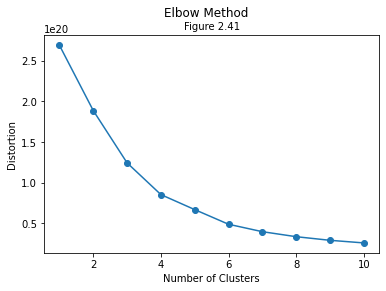

In [17]:
distortions = []

for i in range(1,11):
    km = KMeans(n_clusters=i,
               init='k-means++',
               n_init=10,
               max_iter=300,
               random_state=1)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.suptitle("Elbow Method", fontsize="large")
plt.title("Figure 2.41", fontsize="medium")
plt.show()

### Perform the Cluster Analysis  
Based on the elbow method above, it appears the optimal number of clusters is 4.  We will now perform the cluster analysis to see if the clusters can be easily distinguished and clearly separable.  Based on the results, it does appear there are some clusters which can be easily separated.  However, there are several cluster centroids which appear to be very close together and therefore we cannot clearly define the clusters.

In [23]:
km_4 = KMeans(n_clusters = 4,
           init='k-means++',
           n_init=10,
           max_iter=300,
           tol=1e-04,
           random_state=0)
y_km_4 = km_4.fit_predict(X)
print("done")

done


In [38]:
aml_df_c1.to_excel("aml_df_c1.xlsx", index=False)
aml_df_c2.to_excel("aml_df_c2.xlsx", index=False)
aml_df_c3.to_excel("aml_df_c3.xlsx", index=False)
aml_df_c4.to_excel("aml_df_c4.xlsx", index=False)

ValueError: This sheet is too large! Your sheet size is: 5795648, 15 Max sheet size is: 1048576, 16384

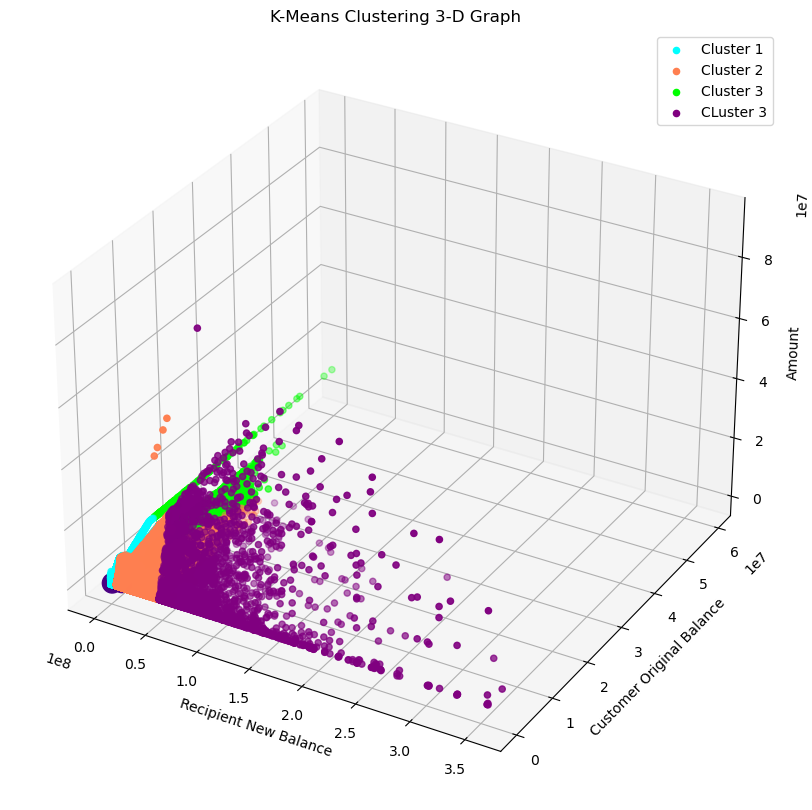

In [36]:
aml_df = aml_df.assign(clusters = y_km_4)

aml_df_c1 = aml_df[aml_df.clusters==0]
aml_df_c2 = aml_df[aml_df.clusters==1]
aml_df_c3 = aml_df[aml_df.clusters==2]
aml_df_c4 = aml_df[aml_df.clusters==3]

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')

xline = np.linspace(0, 100, 10000)
yline = np.linspace(0, 100, 10000)
zline = np.linspace(0, 100, 10000)

ax.scatter(xline, yline, zline, 'black')
ax.scatter(aml_df_c1.Rec_Balance_New, aml_df_c1.Cust_Balance_Orig, aml_df_c1.Amount, c='aqua', label="Cluster 1")
ax.scatter(aml_df_c2.Rec_Balance_New, aml_df_c2.Cust_Balance_Orig, aml_df_c2.Amount, c='coral', label="Cluster 2")
ax.scatter(aml_df_c3.Rec_Balance_New, aml_df_c3.Cust_Balance_Orig, aml_df_c3.Amount, c='lime', label="Cluster 3")
ax.scatter(aml_df_c4.Rec_Balance_New, aml_df_c4.Cust_Balance_Orig, aml_df_c4.Amount, c='purple', label="CLuster 3")
ax.scatter(km_4.cluster_centers_[:, 0], km_4.cluster_centers_[:, 1], color='indigo', s=200)
ax.legend()
ax.set_xlabel('Recipient New Balance')
ax.set_ylabel('Customer Original Balance')
ax.set_zlabel('Amount')
plt.title("K-Means Clustering 3-D Graph", fontsize="large")
#plt.title("Figure 2.42", fontsize="medium")
plt.show()

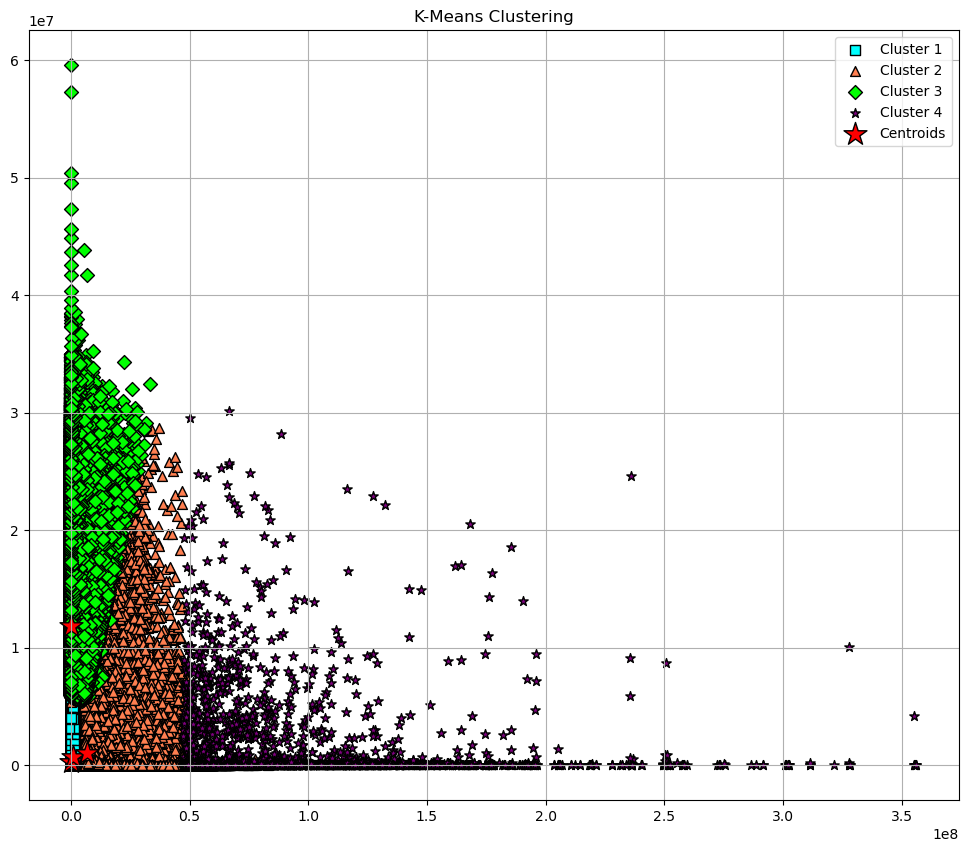

In [37]:
fig, ax = plt.subplots(figsize=(12,10))
plt.scatter(aml_df_c1.Rec_Balance_New, aml_df_c1.Cust_Balance_Orig,
           s=50, c='aqua',
           marker='s', edgecolor='black',
           label='Cluster 1')
plt.scatter(aml_df_c2.Rec_Balance_New, aml_df_c2.Cust_Balance_Orig,
           s=50, c='coral',
           marker='^', edgecolor='black',
           label='Cluster 2')
plt.scatter(aml_df_c3.Rec_Balance_New, aml_df_c3.Cust_Balance_Orig,
           s=50, c='lime',
           marker='D', edgecolor='black',
           label='Cluster 3')
plt.scatter(aml_df_c4.Rec_Balance_New, aml_df_c4.Cust_Balance_Orig, 
           s=50, c='purple',
           marker='*', edgecolor='black',
           label='Cluster 4')
plt.scatter(km_4.cluster_centers_[:,0],
           km_4.cluster_centers_[:, 1],
           s=300, marker='*',
           c='red', edgecolor='black',
           label='Centroids')
plt.legend(scatterpoints=1)
plt.title("K-Means Clustering", fontsize="large")
#plt.title("Figure 2.43", fontsize="medium")
plt.grid()
plt.show()

In [65]:
clusters_df = pd.DataFrame(columns = ['Amount', 'Cust_Balance_Orig', 'Cust_Balance_New', 'Rec_Balance_Orig', 'Rec_Balance_New',
                       'Flagged_Fraud', 'COB_CNB_eq100', 'ROB_RNB_lt200_Tran_lt150', 'ROB_RNB_gt100', 
                       'trans__CASH_OUT', 'trans__DEBIT', 'trans__PAYMENT', 'trans__TRANSFER', 'AML_Label'])
for i in range(0,4):
    series_row = pd.Series(aml_df[km_4.labels_==i].mean())
    clusters_df = clusters_df.append(series_row,ignore_index=True)

clusters_df.index = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']
clusters_df

C:\Users\rewar\AppData\Local\Temp\ipykernel_3476\3649134757.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clusters_df = clusters_df.append(series_row,ignore_index=True)
C:\Users\rewar\AppData\Local\Temp\ipykernel_3476\3649134757.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clusters_df = clusters_df.append(series_row,ignore_index=True)
C:\Users\rewar\AppData\Local\Temp\ipykernel_3476\3649134757.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clusters_df = clusters_df.append(series_row,ignore_index=True)
C:\Users\rewar\AppData\Local\Temp\ipykernel_3476\3649134757.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster

,Amount,Cust_Balance_Orig,Cust_Balance_New,Rec_Balance_Orig,Rec_Balance_New,Flagged_Fraud,COB_CNB_eq100,ROB_RNB_lt200_Tran_lt150,ROB_RNB_gt100,trans__CASH_OUT,trans__DEBIT,trans__PAYMENT,trans__TRANSFER,AML_Label,clusters
Cluster 1,151497.713315,274067.722926,288108.934608,593421.987963,695178.072408,0.000002,0.000001,0.467484,0.309954,0.363904,0.006752,0.371211,0.080026,0.001347,0.0
Cluster 2,717423.856231,702195.383469,729041.894923,10520232.119823,11321958.800577,0.0,0.0,0.0,0.594557,0.47934,0.008527,0.0,0.253927,0.001007,1.0
Cluster 3,164935.63553,11837425.44597,11993416.608174,1555090.180388,1411373.920424,0.00002,0.0,0.114814,0.025651,0.000084,0.0,0.000285,0.0005,0.000453,2.0
Cluster 4,6842892.805598,1028835.028182,1056390.604713,78956917.761871,86900551.601689,0.0,0.0,0.0,0.657143,0.344121,0.009861,0.0,0.417193,0.000506,3.0


## Feature Selection

We will perform feature selection to determine if any of our variables hold more influence over the target variable, and should be considered over others when we create our models.  We will perform two types of feature selection, random forests and XGBoost Classifier, to see if the two types of feature selection return different results.

### Random Forests  
We will use the feature importance attribute from the Random Forest Classifier in scikit learn to help determine which features most improve the purity measurement of the nodes in the decision tree.  We will start by splitting the X and y dataframes into a train and test dataset, with 70% allocated for the train dataset and 30% for the test dataset.  We will then plot the feature importance from largest to smallest influence.  

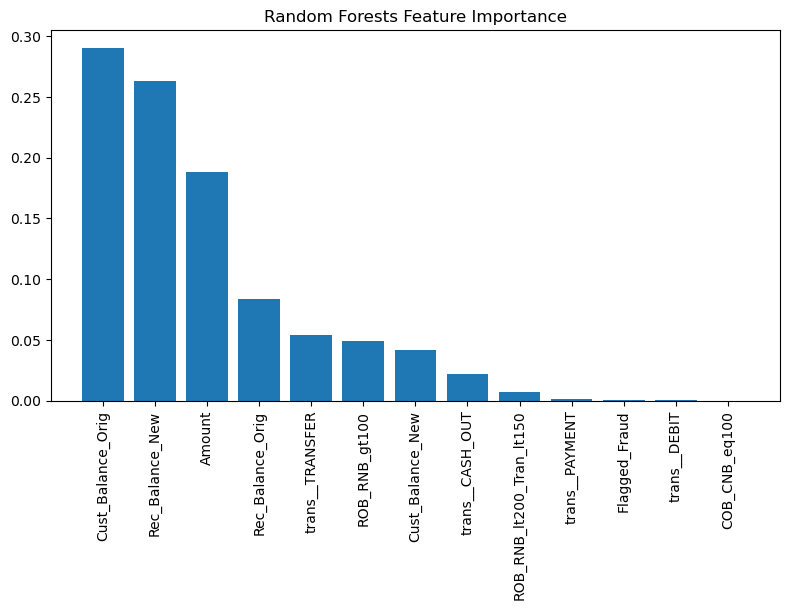

1) Cust_Balance_Orig    0.290517
2) Rec_Balance_New      0.262998
3) Amount               0.187944
4) Rec_Balance_Orig     0.083993
5) trans__TRANSFER      0.053576
6) ROB_RNB_gt100        0.048824
7) Cust_Balance_New     0.041456
8) trans__CASH_OUT      0.022222
9) ROB_RNB_lt200_Tran_lt150 0.006708
10) trans__PAYMENT       0.001210
11) Flagged_Fraud        0.000508
12) trans__DEBIT         0.000043
13) COB_CNB_eq100        0.000000


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

feat_labels = aml_df.columns
forest = RandomForestClassifier(n_estimators=500,random_state=1)
forest.fit(X_train,np.ravel(y_train))
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(8,6))
plt.bar(range(X_train.shape[1]),importances[indices],align='center')
plt.xticks(range(X_train.shape[1]),feat_labels[indices],rotation=90)
plt.xlim([-1,X_train.shape[1]])
plt.tight_layout()
plt.title("Random Forests Feature Importance", fontsize="large")
#plt.title("Figure 3.10", fontsize="medium")
plt.show()

for f in range(len(indices[:14])):
    print('{}) {:<20} {:6f}'.format(f+1,feat_labels[indices[f]],importances[indices[f]]))

In [1]:
fig, ax = plt.subplots(figsize=(8,6))
plt.bar(range(X_train.shape[1]),importances[indices],align='center')
plt.xticks(range(X_train.shape[1]),feat_labels[indices],rotation=90)
plt.xlim([-1,X_train.shape[1]])
plt.tight_layout()
plt.title("Random Forests Feature Importance", fontsize="large")
#plt.title("Figure 3.10", fontsize="medium")
plt.show()

NameError: name 'plt' is not defined

### XGBoost Classifier
XGBoost Classifier is an ensemble method for decision trees which uses a loss function and an additive approach to creating the model.  Like Random Forests, XGBoost Classifier produces the feature importance for the independent variables and we will plot this importance to compare with the Random Forests.  

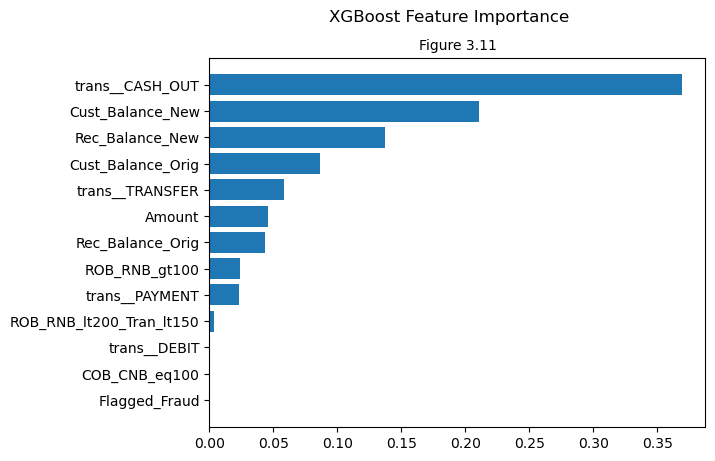

In [41]:
xgb = XGBClassifier(random_state=1)
xgb.fit(X_train, y_train)

sorted_idx = xgb.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], xgb.feature_importances_[sorted_idx])
plt.suptitle("XGBoost Feature Importance", fontsize="large")
plt.title("Figure 3.11", fontsize="medium")
plt.show()

## Conclusion

As stated in the business proposal, we are attempting to predict if a customer is engaged in money laundering or not. The financial institution we are working with provided a synthetic transactional dataset for this analysis, as providing true customer data could potentially result in both ethical and security concerns. When we reviewed the data dictionary and loaded the dataset, there are two variables which reference the customers’ and recipients’ identification number. When the columns were reviewed, there are no distinguishing details included in the columns, however there are over six million unique customers and two million unique recipients. If each customer and recipient were added as a categorical variable, potentially eight million categorical variables would be added to the dataset, which could introduce noise to the dataset and reduce the accuracy of the models. The dataset was also reviewed to determine if there are any missing or null values as those would have to be accounted for prior to creating the models. As the dataset was synthetic there are no missing values; however, when the models receive data from the financial institution’s transactional database there may be missing or null values. The dataset also included a step variable to represent an incremental one-hour period over a 31-day period from January 1 to 31, 2022. Since the step variable was represented in an integer format, this will need to be converted to datetime format and requires first converting to string format and then datetime format. The column names of the dataset were then changed to more clearly understand the data represented in the columns. The AML_Label and Flagged_Fraud label, both represent categorical variables which are represented with zeros and ones. Prior to creating the visualizations, we will change these to string format so they can be more easily interpreted in our visualizations. Once this initial analysis is complete, the dataset is ready for visualization.

Figure 2.1 displays a large class imbalance in our target variable, with only 0.0013% of the data belonging to our desired class and will need to be addressed prior to creating our models. We will explore undersampling, oversampling and synthetic minority oversampling technique (SMOTE) to address the imbalance. There is also a significant difference of almost \\$1 million between the means for transactions engaged in money laundering versus those which are not. The mean dollar amount of the customer original balance and new balances after the transaction does not vary significantly when tagged as money laundering, as shown in Figures 2.3 and 2.4.  On the other hand, the same graph shows there is a dramatic drop in the mean of almost \\$1.5  million between the customer original and new balances for accounts engaged in money laundering. We can see in Figure 2.11 there is a direct correlation between the customer original balance and money laundering transactions. For the cash out and transfer transaction types, the original balance is higher for transactions engaged in money laundering. Similarly in Figure 2.13, as the customer original balance increases for money laundering transactions the customer new balance after the transaction decreases by \\$100,000. We created a new categorical variable, which returns a yes or no value based on if the difference between the customer original and new balances is equal to \\$100,000. Figures 2.5 and 2.6 demonstrate a similar pattern for the recipient balance, where for accounts not tagged as money laundering the difference in the average balance between the original and new balances differs by approximately \\$100,000. However, for accounts tagged as money laundering there is a \\$700,000 difference between the recipient original and new balances. Another new variable was created based on the difference between the recipient original and new balances, where based on if the new balance increased by more than $100,000 a yes or no value is returned. There is also a strong relationship between the recipient old balance, recipient new balance and the transaction amount. When we look at Figures 2.23 and 2.28, we can see if the recipients original or new balance is less than \\$200,000 and the transaction amount is less than \\$150,000 these transactions are more likely to be tagged as money laundering. To explore the interaction between these variables and the target variable, we created the final new variable which returns a yes or no categorical response based on these conditions. 

The distribution of the quantitative variables was also explored to determine if any of the variables are normally distributed. The results for all five of the quantitative variables show the data is skewed, with the largest proportion of transactions falling under \\$100,000 for customer original and new balances, and \\$500,000 for recipient original and new balances. (Figures 2.16, 2.21, 2.26, 2.29, 2.32)  Prior to creating the models, this will need to be addressed through either normalization or standardization. In addition to the distribution, the variation of the quantitative variables over the 31-day period was also explored to see if any patterns emerged. For customer original balance, recipient new balance and transaction amount, there is a large variance in the amount if the transaction is tagged as money laundering and little variance when the transaction is tagged as not money laundering. (Figures 2.15, 2.30, 2.31)  The customer new balance shows a very distinct pattern, in Figure 2.18 we can distinctly see the balance remains near zero and then spikes dramatically at intermittent variables for transactions tagged as money laundering. There is a similar pattern in Figure 2.24, where the recipients original balance has several distinct spikes in the amount based on if the transaction was tagged as fraud. These could both coincide with a major event and some research should be conducted to determine if there is an underlying factor to these spikes.

Another key indicator when building our models will be the transaction type, we can see in Figures 2.8 the majority of transaction types are in the payment, cash out and cash in categories. When we drill down in Figure 2.9 and separate the transaction type by if the transaction was tagged as money laundering, there are only two categories which have transactions tagged as money laundering. When we compared this with the results from the Flagged Fraud model in Figure 2.33 this is even more apparent as all the Flagged Fraud transactions are in the transfer transaction type. The existing Flagged Fraud model tags transactions over \\$200,000, and in Figure 2.7 it shows the transactions tagged by the model all fall into the same category as those tagged as money laundering. This may be an important indicator of which transaction types are more likely to be involved in money laundering and should be considered when we build our final model. A correlation matrix was also constructed to determine what correlations exists between the target variable and the independent variables. Figure 2.40 displays the results, which along with the results from our visualizations confirm there is a strong correlation between the recipients original and new balances and the target variable. To further explore this relationship and determine if the data can be easily separated into similar groups, cluster analysis was performed. The results are displayed in Figures 2.42 and 2.43, both graphs show there are some distinct clusters which are discernable in the data. However, one can also see there are three cluster centroids which are close to each other, and the corresponding clusters are harder to separate. This is confirmed when we look at the mean for the transaction amount for clusters one and three, which only differ by \\$10,000. Finally, both Random Forests and XGBoost Classifier were utilized to determine which features exert more influence over the target variable. While both are decision tree-based classifiers, Random Forests uses an impurity measure to split the nodes of the decision tree and XGBoost Classifier focuses on the errors of the previous tree to build the decision trees sequentially. While the results differ slightly, Figures 2.44 and 2.45 show there are three variables which are the same - the customers original balance, recipients new balance, and the transfer transaction type. When we build the final model, we will want to explore different combinations of the top variables from both Random Forests and XGBoost to determine which best improve the model.